http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html 

In [1]:
import numpy as np  
import pandas as pd 
import math

In [89]:
# Tells matplotlib to display images inline instead of a new window
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
year2001_5clusters = pd.read_csv("../../crimesInChicagoData/year2001_5clusters.csv")

In [3]:
year2001_5clusters.head()

Unnamed: 0  index  IUCR                Primary Type  \
0           0      6  0266         CRIM SEXUAL ASSAULT   
1           1     17  1753  OFFENSE INVOLVING CHILDREN   
2           2     18  0840                       THEFT   
3           3     20  1754  OFFENSE INVOLVING CHILDREN   
4           4     25  1563                 SEX OFFENSE   

                      Description Location Description  Arrest  Domestic  \
0                       PREDATORY            RESIDENCE    True      True   
1   SEX ASSLT OF CHILD BY FAM MBR            RESIDENCE    True     False   
2   FINANCIAL ID THEFT: OVER $300                OTHER   False     False   
3  AGG SEX ASSLT OF CHILD FAM MBR            RESIDENCE    True     False   
4           CRIMINAL SEXUAL ABUSE            RESIDENCE   False     False   

   District    Year  Month  Day  Hour  index.1  clusters_5  
0       5.0  2001.0      1    1    11        0           1  
1       8.0  2001.0      1    1     0        1           4  
2       9.0  2001.0      1    1     0        2           3  
3       7.0  2001.0      6   16     8        3           2  
4      15.0  2001.0      6    1     8        4           1

In [4]:
year2001_5clusters = year2001_5clusters.drop(['Unnamed: 0', 'index'], axis =1 )

In [5]:
year2001_5clusters 

IUCR                Primary Type                     Description  \
0       0266         CRIM SEXUAL ASSAULT                       PREDATORY   
1       1753  OFFENSE INVOLVING CHILDREN   SEX ASSLT OF CHILD BY FAM MBR   
2       0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
3       1754  OFFENSE INVOLVING CHILDREN  AGG SEX ASSLT OF CHILD FAM MBR   
4       1563                 SEX OFFENSE           CRIMINAL SEXUAL ABUSE   
5       0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
6       0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
7       0842                       THEFT         AGG: FINANCIAL ID THEFT   
8       1752  OFFENSE INVOLVING CHILDREN   AGG CRIM SEX ABUSE FAM MEMBER   
9       0842                       THEFT         AGG: FINANCIAL ID THEFT   
10      0265         CRIM SEXUAL ASSAULT               AGGRAVATED: OTHER   
11      0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
12      1150          DECEPTIVE PRACTICE               CREDIT CARD FRAUD   
13      0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
14      0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
15      0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
16      0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
17      2825               OTHER OFFENSE         HARASSMENT BY TELEPHONE   
18      1753  OFFENSE INVOLVING CHILDREN   SEX ASSLT OF CHILD BY FAM MBR   
19      1130          DECEPTIVE PRACTICE        FRAUD OR CONFIDENCE GAME   
20      0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
21      1150          DECEPTIVE PRACTICE               CREDIT CARD FRAUD   
22      0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
23      0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
24      0841                       THEFT  FINANCIAL ID THEFT:$300 &UNDER   
25      0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
26      0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
27      0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
28      1140          DECEPTIVE PRACTICE                    EMBEZZLEMENT   
29      0841                       THEFT  FINANCIAL ID THEFT:$300 &UNDER   
...      ...                         ...                             ...   
568487  0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
568488  0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
568489  0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
568490  1754  OFFENSE INVOLVING CHILDREN  AGG SEX ASSLT OF CHILD FAM MBR   
568491  1562                 SEX OFFENSE       AGG CRIMINAL SEXUAL ABUSE   
568492  0840                       THEFT   FINANCIAL ID THEFT: OVER $300   
568493  1563                 SEX OFFENSE           CRIMINAL SEXUAL ABUSE   
568494  1752  OFFENSE INVOLVING CHILDREN   AGG CRIM SEX ABUSE FAM MEMBER   
568495  0560                     ASSAULT                          SIMPLE   
568496  0620                    BURGLARY                  UNLAWFUL ENTRY   
568497  0460                     BATTERY                          SIMPLE   
568498  1310             CRIMINAL DAMAGE                     TO PROPERTY   
568499  041A                     BATTERY             AGGRAVATED: HANDGUN   
568500  1310             CRIMINAL DAMAGE                     TO PROPERTY   
568501  0820                       THEFT                  $500 AND UNDER   
568502  0320                     ROBBERY           STRONGARM - NO WEAPON   
568503  5001               OTHER OFFENSE  OTHER CRIME INVOLVING PROPERTY   
568504  0320                     ROBBERY           STRONGARM - NO WEAPON   
568505  0610                    BURGLARY                  FORCIBLE ENTRY   
568506  0460                     BATTERY                          SIMPLE   
568507  0820                       THEFT                

In [6]:
year2001_5clusters.shape

(568517, 13)

# Training and Test Data Subset 

In [7]:
import random 
random.seed(1)

In [8]:
msk = np.random.rand(len(year2001_5clusters)) < 0.7

In [9]:
train = year2001_5clusters[msk]

In [10]:
test = year2001_5clusters[~msk]

In [11]:
len(train)

397694

In [12]:
len(test)

170823

# Train Text? 

In [13]:
train_x = train['Description'].values

In [14]:
train_y = train['clusters_5'].values

In [15]:
test_x = test['Description'].values

In [16]:
test_y = test['clusters_5'].values

# Tokenizing text with scikit-learn

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
count_vect = CountVectorizer()

In [19]:
train_counts = count_vect.fit_transform(train_x)

In [20]:
train_counts.shape

(397694, 340)

In [21]:
type(train_counts)

scipy.sparse.csr.csr_matrix

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer

In [23]:
tfidf_transformer = TfidfTransformer()

In [24]:
train_x_tfidf = tfidf_transformer.fit_transform(train_counts)

In [25]:
train_x_tfidf.shape

(397694, 340)

In [26]:
test_counts = count_vect.transform(test_x)

In [27]:
test_x_tfidf = tfidf_transformer.transform(test_counts)

# Training a Classifier

In [28]:
from sklearn.naive_bayes import MultinomialNB


In [29]:
clf = MultinomialNB().fit(train_x_tfidf, train_y)

In [30]:
predicted = clf.predict(test_x_tfidf)

In [31]:
for test_row, cluster in zip(test_x, predicted): 
    print('%r => %s' % (test_row, train_y[cluster]))

'FINANCIAL ID THEFT: OVER $300' => 1
'AGG SEX ASSLT OF CHILD FAM MBR' => 0
'FINANCIAL ID THEFT: OVER $300' => 1
'AGG: FINANCIAL ID THEFT' => 1
'CREDIT CARD FRAUD' => 0
'FINANCIAL ID THEFT: OVER $300' => 1
'HARASSMENT BY TELEPHONE' => 0
'FINANCIAL ID THEFT: OVER $300' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'EMBEZZLEMENT' => 1
'FINANCIAL ID THEFT:$300 &UNDER' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'FINANCIAL ID THEFT:$300 &UNDER' => 1
'HARASSMENT BY TELEPHONE' => 0
'CREDIT CARD FRAUD' => 0
'FINANCIAL ID THEFT:$300 &UNDER' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'FINANCIAL ID THEFT:$300 &UNDER' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'NON-AGGRAVATED' => 4
'AGG CRIM SEX ABUSE FAM MEMBER' => 0
'FINANCIAL ID THEFT: OVER $300' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'AGG CRIMINAL SEXUAL ABUSE' => 0
'FINANCIAL ID THEFT:$300 &UNDER' => 1
'FINANCIAL ID THEFT:$300 &UNDER' => 

'$500 AND UNDER' => 1
'STRONGARM - NO WEAPON' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'TO PROPERTY' => 0
'VIOLATE ORDER OF PROTECTION' => 0
'AGGRAVATED: HANDGUN' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 0
'TO VEHICLE' => 0
'UNLAWFUL USE OTHER FIREARM' => 4
'$500 AND UNDER' => 1
'TO PROPERTY' => 0
'FRAUD OR CONFIDENCE GAME' => 0
'AGGRAVATED' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'SIMPLE' => 4
'THEFT OF LOST/MISLAID PROP' => 1
'TO PROPERTY' => 0
'TO PROPERTY' => 0
'AUTOMOBILE' => 1
'TO PROPERTY' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'TO PROPERTY' => 0
'ARMED:KNIFE/CUTTING INSTRUMENT' => 1
'SIMPLE' => 4
'TO STATE SUP PROP' => 1
'VIOLATE ORDER OF PROTECTION' => 0
'ATTEMPT THEFT' => 1
'SIMPLE' => 4
'TO LAND' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TO PROPERTY' => 0
'TO PROPERTY' => 0
'TELEPHONE THREAT' =

'STRONGARM - NO WEAPON' => 1
'SIMPLE' => 4
'ARMED: HANDGUN' => 1
'TO PROPERTY' => 0
'THEFT/RECOVERY: TRUCK,BUS,MHOME' => 1
'$500 AND UNDER' => 1
'AGG CRIMINAL SEXUAL ABUSE' => 0
'TO VEHICLE' => 0
'AGGRAVATED' => 4
'TO VEHICLE' => 0
'SIMPLE' => 4
'TO PROPERTY' => 0
'TO PROPERTY' => 0
'TO VEHICLE' => 0
'TO VEHICLE' => 0
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'HARASSMENT BY TELEPHONE' => 0
'UNLAWFUL POSS OF HANDGUN' => 1
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'FINAN EXPLOIT-ELDERLY/DISABLED' => 0
'$500 AND UNDER' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'TO LAND' => 1
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'UNLAWFUL ENTRY' => 0
'SIMPLE' => 4
'TO PROPERTY' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TO PROPERTY' => 0
'HARASSMENT BY TELEPHONE' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'ARMED: HANDGUN' => 1
'TO VEHICLE' => 0
'HARASSMENT BY TELEPHONE' => 0
'TELEPHONE THREAT' => 0
'TO PROPERTY

'SIMPLE' => 4
'HARASSMENT BY TELEPHONE' => 0
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'TO STATE SUP PROP' => 1
'SIMPLE' => 4
'TO STATE SUP LAND' => 1
'SIMPLE' => 4
'OVER $500' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'TO PROPERTY' => 0
'SIMPLE' => 4
'OVER $500' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'TO VEHICLE' => 0
'OVER $500' => 1
'OVER $500' => 1
'RECKLESS CONDUCT' => 1
'OVER $500' => 1
'VIOLATE ORDER OF PROTECTION' => 0
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'OVER $500' => 1
'TO PROPERTY' => 0
'AUTOMOBILE' => 1
'SIMPLE' => 4
'HARASSMENT BY TELEPHONE' => 0
'TELEPHONE THREAT' => 0
'$500 AND UNDER' => 1
'OVER $500' => 1
'TO VEHICLE' => 0
'SIMPLE' => 4
'OVER $500' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'INTIMIDATION' => 1
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 0
'TO LAND' => 1
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'TELEPHONE THREAT' => 0
'OVER $500' => 1
'OVER $500' => 1
'OVER $500' => 1
'TO PROPERT

'MANU/DELIVER:CRACK' => 1
'AUTOMOBILE' => 1
'UNLAWFUL USE OTHER DANG WEAPON' => 4
'TO VEHICLE' => 0
'SIMPLE' => 4
'POSS: CANNABIS MORE THAN 30GMS' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'POSS: CRACK' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'TO PROPERTY' => 0
'UNLAWFUL USE OTHER DANG WEAPON' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'TELEPHONE THREAT' => 0
'HARASSMENT BY TELEPHONE' => 0
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'TRUCK, BUS, MOTOR HOME' => 1
'TO VEHICLE' => 0
'CONTRIBUTE DELINQUENCY OF A CHILD' => 0
'AUTOMOBILE' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'SIMPLE' => 4
'OVER $500' => 1
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'TO VEHICLE' => 0
'TELEPHONE THREAT' => 0
'TRUCK, BUS, MOTOR HOME' => 1
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'FORCIBLE ENTRY' => 0
'TO VEHICLE' => 0
'UNLAWFUL ENTRY' => 0
'SIMPLE' => 4
'TO VEHICLE' => 0
'SIMPLE' => 4
'HARASSMENT BY TELEPHONE' => 0
'SIMPLE' => 4
'TELEPHONE THREAT' => 0
'$5

'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'OVER $500' => 1
'OVER $500' => 1
'MANU/DELIVER:CRACK' => 1
'ARMED: HANDGUN' => 1
'OVER $500' => 1
'FALSE POLICE REPORT' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'PUBLIC INDECENCY' => 1
'AUTOMOBILE' => 1
'OVER $500' => 1
'ARMED: HANDGUN' => 1
'FORCIBLE ENTRY' => 0
'VIOLATE ORDER OF PROTECTION' => 0
'UNLAWFUL USE OTHER DANG WEAPON' => 4
'TO PROPERTY' => 0
'POSS: CANNABIS 30GMS OR LESS' => 1
'OTHER CRIME INVOLVING PROPERTY' => 0
'SIMPLE' => 4
'AUTOMOBILE' => 1
'FORCIBLE ENTRY' => 0
'$500 AND UNDER' => 1
'STRONGARM - NO WEAPON' => 1
'TO VEHICLE' => 0
'TO VEHICLE' => 0
'TO LAND' => 1
'UNLAWFUL ENTRY' => 0
'POSS: CANNABIS 30GMS OR LESS' => 1
'FORCIBLE ENTRY' => 0
'GAME/DICE' => 1
'UNLAWFUL ENTRY' => 0
'SIMPLE' => 4
'POSS: HEROIN(WHITE)' => 1
'TO PROPERTY' => 0
'FORCIBLE ENTRY' => 0
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'ALTER/FORGE PRESCRIPTION' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'SIMPLE' => 4
'TRUCK, BUS, MOTOR HOM

'POSS: HEROIN(WHITE)' => 1
'TO VEHICLE' => 0
'$500 AND UNDER' => 1
'POSS: CRACK' => 1
'$500 AND UNDER' => 1
'ALTER/FORGE PRESCRIPTION' => 1
'OTHER CRIME INVOLVING PROPERTY' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'HARASSMENT BY TELEPHONE' => 0
'POSS: CANNABIS 30GMS OR LESS' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'POSS: CRACK' => 1
'TO VEHICLE' => 0
'SIMPLE' => 4
'ARMED: OTHER DANGEROUS WEAPON' => 1
'$500 AND UNDER' => 1
'POSS: CRACK' => 1
'AUTOMOBILE' => 1
'TELEPHONE THREAT' => 0
'OTHER CRIME INVOLVING PROPERTY' => 0
'TELEPHONE THREAT' => 0
'$500 AND UNDER' => 1
'SIMPLE' => 4
'OVER $500' => 1
'TO PROPERTY' => 0
'OVER $500' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'OBSCENE TELEPHONE CALLS' => 0
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'TELEPHONE THREAT' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'ARMED: HANDGUN' => 1
'OVER $500' => 1
'TELEPHONE THREAT' => 0
'ATTEMPT THEFT' => 1
'BOGUS CHECK' => 1
'OBSCENE TELEP

'TO LAND' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'TO PROPERTY' => 0
'TO PROPERTY' => 0
'TO PROPERTY' => 0
'AGGRAVATED: OTHER DANG WEAPON' => 4
'FORCIBLE ENTRY' => 0
'FORCIBLE ENTRY' => 0
'OVER $500' => 1
'FORCIBLE ENTRY' => 0
'ARMED: HANDGUN' => 1
'SIMPLE' => 4
'FORCIBLE ENTRY' => 0
'HARASSMENT BY TELEPHONE' => 0
'OVER $500' => 1
'STRONGARM - NO WEAPON' => 1
'STRONGARM - NO WEAPON' => 1
'UNLAWFUL ENTRY' => 0
'TO VEHICLE' => 0
'TO STATE SUP LAND' => 1
'NON-AGGRAVATED' => 4
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'TO LAND' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'TO VEHICLE' => 0
'ARMED: HANDGUN' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'OVER $500' => 1
'TO LAND' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'TO PROPERTY' => 0
'FORCIBLE E

'TELEPHONE THREAT' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'HARASSMENT BY TELEPHONE' => 0
'HARASSMENT BY TELEPHONE' => 0
'HARASSMENT BY TELEPHONE' => 0
'OVER $500' => 1
'AUTOMOBILE' => 1
'FRAUD OR CONFIDENCE GAME' => 0
'TELEPHONE THREAT' => 0
'OTHER CRIME INVOLVING PROPERTY' => 0
'TELEPHONE THREAT' => 0
'TELEPHONE THREAT' => 0
'TELEPHONE THREAT' => 0
'TELEPHONE THREAT' => 0
'$500 AND UNDER' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'AUTOMOBILE' => 1
'AGGRAVATED: HANDGUN' => 4
'CRIMINAL SEXUAL ABUSE' => 0
'AGGRAVATED: HANDGUN' => 4
'COUNTERFEITING DOCUMENT' => 1
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'ARMED:KNIFE/CUTTING INSTRUMENT' => 1
'TO VEHICLE' => 0
'SIMPLE' => 4
'AGGRAVATED: HANDGUN' => 4
'FORCIBLE ENTRY' => 0
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'ARMED: HANDGUN' => 1
'TO VEHICLE' => 0
'STRO

'SOLICIT ON PUBLIC WAY' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'SOLICIT ON PUBLIC WAY' => 1
'POSS: HEROIN(WHITE)' => 1
'HARASSMENT BY TELEPHONE' => 0
'TO LAND' => 1
'POSS: HEROIN(WHITE)' => 1
'SOLICIT NARCOTICS ON PUBLICWAY' => 1
'MANU/DELIVER:CRACK' => 1
'POSS: CRACK' => 1
'POSS: HEROIN(WHITE)' => 1
'POSS: CRACK' => 1
'POSS: CRACK' => 1
'POSS: COCAINE' => 1
'POSS: CRACK' => 1
'POSS: CRACK' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'OVER $500' => 1
'GAME/DICE' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'OBSCENE TELEPHONE CALLS' => 0
'AUTOMOBILE' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'HARASSMENT BY TELEPHONE' => 0
'$500 AND UNDER' => 1
'UNLAWFUL ENTRY' => 0
'AGGRAVATED: OTHER DANG WEAPON' => 4
'TO PROPERTY' => 0
'TO PROPERTY' => 0
'SIMPLE' => 4
'TO PROPERTY' => 0
'OVER $500' => 1
'FRAUD OR CONFIDENCE GAME' => 0
'OVER $500' => 1
'HARASSMENT BY TELEPHONE' => 0
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'T

'TO VEHICLE' => 0
'POSS: CRACK' => 1
'TRUCK, BUS, MOTOR HOME' => 1
'SOLICIT ON PUBLIC WAY' => 1
'SOLICIT ON PUBLIC WAY' => 1
'HARASSMENT BY TELEPHONE' => 0
'POSS: CANNABIS 30GMS OR LESS' => 1
'PATRONIZING A PROSTITUTE' => 1
'SIMPLE' => 4
'OVER $500' => 1
'TO LAND' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'OVER $500' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'SALE/DEL HYPODERMIC NEEDLE' => 1
'TO LAND' => 1
'POSS: CRACK' => 1
'OTHER CRIME INVOLVING PROPERTY' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'POSS: HEROIN(WHITE)' => 1
'SALE/DEL HYPODERMIC NEEDLE' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'UNLAWFUL POSS OF HANDGUN' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'SOLICIT ON PUBLIC WAY' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'FORCIBLE ENTRY' => 0
'$500 AND UNDER' => 1
'OVER $500' => 1
'POSS: HEROIN(WHITE)' => 1
'TO LAND' => 1
'SIMPLE' => 4
'OVER $500' => 1
'OVER $500' => 1
'SIMPLE' => 4
'POSS: CRACK' => 1
'SIMPLE' => 4
'POSS: HEROIN(WHITE)' => 1
'SIMPLE'

'FALSE POLICE REPORT' => 1
'FRAUD OR CONFIDENCE GAME' => 0
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'POSS: HEROIN(WHITE)' => 1
'MANU/DELIVER:CRACK' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'BY FIRE' => 0
'MANU/DEL:CANNABIS 10GM OR LESS' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'POSS: CRACK' => 1
'POSS: COCAINE' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SOLICIT ON PUBLIC WAY' => 1
'$500 AND UNDER' => 1
'TRUCK, BUS, MOTOR HOME' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'$500 AND UNDER' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'ILLEGAL CONSUMPTION BY MINOR' => 1
'TO LAND' => 1
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 0
'POSS: CRACK' => 1
'OVER $500' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'ARMED: HANDGUN' => 1
'$500 AND UNDER' => 1
'POSS: HEROIN(WHITE)' => 1
'POSS: HEROIN(WHITE)' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'VIOLATE ORDER OF PROTECTION' => 0
'POSS: HEROIN(WHITE

'OVER $500' => 1
'OTHER CRIME INVOLVING PROPERTY' => 0
'AGGRAVATED: OTHER DANG WEAPON' => 4
'TO VEHICLE' => 0
'OTHER CRIME INVOLVING PROPERTY' => 0
'$500 AND UNDER' => 1
'POSS: CRACK' => 1
'AGGRAVATED: HANDGUN' => 4
'OVER $500' => 1
'POSS: CRACK' => 1
'UNLAWFUL USE OTHER DANG WEAPON' => 4
'PUBLIC INDECENCY' => 1
'HARASSMENT BY TELEPHONE' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'OTHER CRIME INVOLVING PROPERTY' => 0
'TELEPHONE THREAT' => 0
'THEFT OF LOST/MISLAID PROP' => 1
'SELL/GIVE/DEL LIQUOR TO MINOR' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'TELEPHONE THREAT' => 0
'POSS: HEROIN(WHITE)' => 1
'THEFT OF LABOR/SERVICES' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'OTHER VEHICLE OFFENSE' => 1
'TELEPHONE THREAT' => 0
'$500 AND UNDER' => 1
'OVER $500' => 1
'FRAUD OR CONFIDENCE GAME' => 0
'POSS: CANNABIS 30GMS OR LESS' => 1
'OTHER CRIME INVOLVING PROPERTY' => 0
'POSS: CRACK' => 1
'TO VEHICLE' => 0
'FRAUD OR CONFIDENCE GAME' => 0
'SIMPLE' => 4
'SIMPLE' 

'OTHER VEHICLE OFFENSE' => 1
'TO PROPERTY' => 0
'UNLAWFUL POSS OF HANDGUN' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TO VEHICLE' => 0
'AGGRAVATED: HANDGUN' => 4
'SIMPLE' => 4
'HARASSMENT BY TELEPHONE' => 0
'TO PROPERTY' => 0
'TO VEHICLE' => 0
'TO LAND' => 1
'SIMPLE' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'TO VEHICLE' => 0
'AGGRAVATED: OTHER DANG WEAPON' => 4
'BOMB THREAT' => 0
'OVER $500' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'OVER $500' => 1
'TO VEHICLE' => 0
'OTHER CRIME INVOLVING PROPERTY' => 0
'AGGRAVATED: OTHER DANG WEAPON' => 4
'POSS: CRACK' => 1
'ARMED: OTHER DANGEROUS WEAPON' => 1
'STRONGARM - NO WEAPON' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'ARMED: HANDGUN' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'POSS: HEROIN(WHITE)' => 1
'OVER $500' => 1
'UNLAWFUL ENTRY' => 0
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'OVER $500' =

'SIMPLE' => 4
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'ATTEMPT ARSON' => 1
'OVER $500' => 1
'TO PROPERTY' => 0
'SIMPLE' => 4
'OVER $500' => 1
'TO PROPERTY' => 0
'SIMPLE' => 4
'AGGRAVATED' => 4
'UNLAWFUL ENTRY' => 0
'AUTOMOBILE' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'AGGRAVATED: HANDGUN' => 4
'TO LAND' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'SIMPLE' => 4
'OVER $500' => 1
'TO PROPERTY' => 0
'SIMPLE' => 4
'THEFT OF LABOR/SERVICES' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'OTHER CRIME INVOLVING PROPERTY' => 0
'TO PROPERTY' => 0
'SIMPLE' => 4
'THEFT OF LABOR/SERVICES' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'TO LAND' => 1
'SIMPLE' => 4
'INTERFERENCE JUDICIAL PROCESS' => 1
'OVER $500' => 1
'OVER $500' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'AGGRAVATED: HANDGUN' => 4
'SIMPLE' => 4
'TO LAND' => 1
'AGG PO HANDS NO/MIN INJURY' => 4
'FORCIBLE ENTRY' => 0
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'TELEPHONE THREAT' =>

'THEFT/RECOVERY: AUTOMOBILE' => 1
'TELEPHONE THREAT' => 0
'TELEPHONE THREAT' => 0
'TO VEHICLE' => 0
'HARASSMENT BY TELEPHONE' => 0
'AUTOMOBILE' => 1
'TELEPHONE THREAT' => 0
'TELEPHONE THREAT' => 0
'$500 AND UNDER' => 1
'FRAUD OR CONFIDENCE GAME' => 0
'HARASSMENT BY TELEPHONE' => 0
'HARASSMENT BY TELEPHONE' => 0
'AUTOMOBILE' => 1
'HARASSMENT BY TELEPHONE' => 0
'TELEPHONE THREAT' => 0
'TO VEHICLE' => 0
'TELEPHONE THREAT' => 0
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'ARMED: HANDGUN' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TO STATE SUP LAND' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'ARMED: HANDGUN' => 1
'TO PROPERTY' => 0
'TO LAND' => 1
'SIMPLE' => 4
'TO LAND' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'TO VEHICLE' => 0
'$500 AND UNDER' => 1
'AGGRAVATED: HANDGUN' => 4
'SIMPLE' => 4
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 0
'$500 AND UNDER' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'TO PROPERTY' => 0
'SIMPLE' => 4
'SIMP

'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'TO LAND' => 1
'SIMPLE' => 4
'POSS: CRACK' => 1
'SEX OFFENDER: FAIL REG NEW ADD' => 0
'TO VEHICLE' => 0
'TO VEHICLE' => 0
'TO PROPERTY' => 0
'TO PROPERTY' => 0
'OTHER CRIME AGAINST PERSON' => 0
'MANU/DELIVER:CRACK' => 1
'POSS: CRACK' => 1
'VIOLATE ORDER OF PROTECTION' => 0
'POSS: CANNABIS 30GMS OR LESS' => 1
'SIMPLE' => 4
'ATT: AUTOMOBILE' => 1
'POSS: COCAINE' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'HARASSMENT BY TELEPHONE' => 0
'AUTOMOBILE' => 1
'POSS: CRACK' => 1
'THEFT/RECOVERY: AUTOMOBILE' => 1
'SIMPLE' => 4
'MANU/DELIVER:CRACK' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'POSS: CANNABIS MORE THAN 30GMS' => 1
'POSS: HEROIN(WHITE)' => 1
'TO VEHICLE' => 0
'SIMPLE' => 4
'THEFT OF LABOR/SERVICES' => 1
'SOLICIT FOR BUSINESS' => 1
'FORCIBLE ENTRY' => 0
'TO PROPERTY' => 0
'SIMPLE' => 4
'FORCIBLE ENTRY' => 0
'MANU/DEL:CANNABIS 10GM OR LESS' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'ARMED: HANDGUN' => 1
'FORCIBLE ENTRY' => 0
'MANU/DELIVER:CRACK' => 1
'HA

'SIMPLE' => 4
'$500 AND UNDER' => 1
'HARASSMENT BY TELEPHONE' => 0
'SIMPLE' => 4
'AUTOMOBILE' => 1
'FRAUD OR CONFIDENCE GAME' => 0
'ATTEMPT FORCIBLE ENTRY' => 1
'POSS: HEROIN(WHITE)' => 1
'FORCIBLE ENTRY' => 0
'OTHER VEHICLE OFFENSE' => 1
'SOLICIT ON PUBLIC WAY' => 1
'THEFT OF LABOR/SERVICES' => 1
'THEFT/RECOVERY: AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'THEFT OF LABOR/SERVICES' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'SOLICIT ON PUBLIC WAY' => 1
'CHILD ABUSE' => 0
'TO VEHICLE' => 0
'OVER $500' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'SIMPLE' => 4
'UNLAWFUL ENTRY' => 0
'VIOLATE ORDER OF PROTECTION' => 0
'SIMPLE' => 4
'OTHER CRIME INVOLVING PROPERTY' => 0
'POSS: CANNABIS 30GMS OR LESS' => 1
'SIMPLE' => 4
'FRAUD OR CONFIDENCE GAME' => 0
'AGGRAVATED: HANDGUN' => 4
'SOLICIT FOR BUSINESS' => 1
'SALE/DEL HYPODERMIC NEEDLE' => 1
'OVER $500' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'POSS: HEROIN(WHITE)' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'TELEPHONE THRE

'SIMPLE' => 4
'POSS: HEROIN(WHITE)' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'TO PROPERTY' => 0
'TO VEHICLE' => 0
'POSS: CANNABIS 30GMS OR LESS' => 1
'OVER $500' => 1
'SIMPLE' => 4
'TO VEHICLE' => 0
'SIMPLE' => 4
'AUTOMOBILE' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'FOUND SUSPECT NARCOTICS' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'POSS: CRACK' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'AGGRAVATED: OTHER FIREARM' => 4
'SIMPLE' => 4
'AUTOMOBILE' => 1
'OVER $500' => 1
'SIMPLE' => 4
'POSS: HEROIN(WHITE)' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'OVER $500' => 1
'POSS: CRACK' => 1
'SIMPLE' => 4
'TO VEHICLE' => 0
'POSS: HEROIN(WHITE)' => 1
'OVER $500' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'STOLEN PROP: BUY/RECEIVE/POS.' => 1
'TO VEHICLE' => 0
'POSS: CRACK' => 1
'TO PROPERTY' => 0
'OTHER VEHICLE OFFENSE' => 1
'ILLEGAL USE CASH CARD' => 0
'TO VEHICLE' => 0
'TO LAND' => 1
'$500 AND UNDER' => 1
'ARMED: HANDGUN' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'AGGRAVATED: HANDGUN' => 4
'STRONGARM - NO W

'TO PROPERTY' => 0
'TELEPHONE THREAT' => 0
'ATTEMPT: ARMED-HANDGUN' => 1
'ARMED: OTHER DANGEROUS WEAPON' => 1
'STRONGARM - NO WEAPON' => 1
'TO PROPERTY' => 0
'AUTOMOBILE' => 1
'SIMPLE' => 4
'BOGUS CHECK' => 1
'TO PROPERTY' => 0
'TO PROPERTY' => 0
'FORCIBLE ENTRY' => 0
'FRAUD OR CONFIDENCE GAME' => 0
'SIMPLE' => 4
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'OTHER CRIME INVOLVING PROPERTY' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'OVER $500' => 1
'FRAUD OR CONFIDENCE GAME' => 0
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 0
'TO PROPERTY' => 0
'UNLAWFUL INTERFERE/VISITATION' => 0
'OVER $500' => 1
'BOGUS CHECK' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 0
'UNLAWFUL POSS OF HANDGUN' => 1
'TO VEHICLE' => 0
'FRAUD OR CONFIDENCE GAME' => 0
'SIMPLE' => 4
'HARASSMENT BY TELEPHONE' => 0
'CREDIT CARD FRAUD' => 0
'SIMPLE' => 4
'OVER $500' => 1
'TO LAND' => 1
'SIMPLE' => 4
'THEFT OF LABOR/SERVICES' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'HARASSMENT BY TELEPHONE' => 0
'TO PROP

'TO PROPERTY' => 0
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'ATTEMPT: ARMED-HANDGUN' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'OVER $500' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'TO VEHICLE' => 0
'$500 AND UNDER' => 1
'ALTER/FORGE PRESCRIPTION' => 1
'TO LAND' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'OVER $500' => 1
'POSS: HEROIN(WHITE)' => 1
'UNLAWFUL ENTRY' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TO VEHICLE' => 0
'CRIMINAL SEXUAL ABUSE' => 0
'SIMPLE' => 4
'ALTER/FORGE PRESCRIPTION' => 1
'SIMPLE' => 4
'SOLICIT NARCOTICS ON PUBLICWAY' => 1
'TO PROPERTY' => 0
'SOLICIT NARCOTICS ON PUBLICWAY' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'OVER $500' => 1
'OVER $500' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'TO VEHICLE' => 0
'SIMPLE' => 4
'OVER $500' => 1
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'POSS: CRACK' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'MANU/DELIVER:CRACK' => 1
'THEFT OF 

'ARMED: HANDGUN' => 1
'ATTEMPT: STRONGARM-NO WEAPON' => 1
'AGGRAVATED: HANDGUN' => 4
'BOGUS CHECK' => 1
'OTHER CRIME INVOLVING PROPERTY' => 0
'AGGRAVATED: HANDGUN' => 4
'$500 AND UNDER' => 1
'OVER $500' => 1
'POSS: CRACK' => 1
'POSS: CRACK' => 1
'POSS: CRACK' => 1
'MANU/DELIVER:CRACK' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'SIMPLE' => 4
'ALTER/FORGE PRESCRIPTION' => 1
'SIMPLE' => 4
'STRONGARM - NO WEAPON' => 1
'TO PROPERTY' => 0
'CALL OPERATION' => 1
'SIMPLE' => 4
'SOLICIT FOR BUSINESS' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'SIMPLE' => 4
'HARASSMENT BY TELEPHONE' => 0
'SIMPLE' => 4
'POSS: CRACK' => 1
'MANU/DELIVER: HEROIN (WHITE)' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'TO VEHICLE' => 0
'OVER $500' => 1
'POSS: CRACK' => 1
'SOLICIT FOR BUSINESS' => 1
'AGG: FINANCIAL ID THEFT' => 1
'SIMPLE' => 4
'TELEPHONE THREAT' => 0
'MANU/DELIVER:CRACK' => 1
'GAME/DICE' => 1
'ATT: AUTOMOBILE' => 1
'HARASSMENT BY TELEPHONE' => 0
'TO PROPERTY' => 0
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 1
'MANU

'TO PROPERTY' => 0
'AGGRAVATED: OTHER DANG WEAPON' => 4
'SIMPLE' => 4
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'TO PROPERTY' => 0
'STRONGARM - NO WEAPON' => 1
'TO STATE SUP LAND' => 1
'OTHER CRIME INVOLVING PROPERTY' => 0
'TO VEHICLE' => 0
'$500 AND UNDER' => 1
'ARMED: HANDGUN' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'ARMED:KNIFE/CUTTING INSTRUMENT' => 1
'ARMED: HANDGUN' => 1
'TO PROPERTY' => 0
'AUTOMOBILE' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'INTERFERENCE JUDICIAL PROCESS' => 1
'THEFT OF LABOR/SERVICES' => 1
'SIMPLE' => 4
'FORCIBLE ENTRY' => 0
'FORCIBLE ENTRY' => 0
'TO VEHICLE' => 0
'$500 AND UNDER' => 1
'SIMPLE' => 4
'NON-AGGRAVATED' => 4
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'STRONGARM - NO WEAPON' => 1
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'AGGRAVATED: HANDGUN' => 4
'AGG CRIMINAL SEXUAL ABUSE' => 0
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'OVER $500

'AGGRAVATED' => 4
'SIMPLE' => 4
'STRONGARM - NO WEAPON' => 1
'OVER $500' => 1
'OVER $500' => 1
'SIMPLE' => 4
'POSS: HEROIN(WHITE)' => 1
'AGGRAVATED VEHICULAR HIJACKING' => 1
'FORCIBLE ENTRY' => 0
'ATTEMPT THEFT' => 1
'AGGRAVATED: HANDGUN' => 4
'$500 AND UNDER' => 1
'OTHER CRIME AGAINST PERSON' => 0
'LIQUOR LICENSE VIOLATION' => 1
'$500 AND UNDER' => 1
'TO PROPERTY' => 0
'OVER $500' => 1
'FOUND SUSPECT NARCOTICS' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'OVER $500' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SOLICIT FOR BUSINESS' => 1
'UNLAWFUL USE/SALE AIR RIFLE' => 1
'FORCIBLE ENTRY' => 0
'TO LAND' => 1
'$500 AND UNDER' => 1
'POSS: COCAINE' => 1
'TO VEHICLE' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'TO PROPERTY' => 0
'OVER $500' => 1
'ARMED: HANDGUN' => 1
'SIMPLE' => 4
'ARMED:KNIFE/CUTTING INSTRUMENT' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'SIMPLE' => 4
'MANU/DELIVER: HEROIN (WHITE)' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'POSS: H

'SIMPLE' => 4
'STRONGARM - NO WEAPON' => 1
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 0
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'POSS: HEROIN(WHITE)' => 1
'AUTOMOBILE' => 1
'POSS: CRACK' => 1
'VEHICULAR HIJACKING' => 1
'SOLICIT ON PUBLIC WAY' => 1
'TO VEHICLE' => 0
'THEFT/RECOVERY: AUTOMOBILE' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'POSS: BARBITUATES' => 1
'STRONGARM - NO WEAPON' => 1
'ILLEGAL CONSUMPTION BY MINOR' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'ARMED: HANDGUN' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'AUTOMOBILE' => 1
'TO STATE SUP LAND' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'$500 AND UNDER' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'SIMPLE' => 4
'OVER $500' => 1
'ARMED:KNIFE/CUTTING INSTRUMENT' => 1
'$500 AND UNDER' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'SALE/DEL HYPODERMIC NEEDLE' => 1
'TO PROPERTY' => 0
'HARASSMENT BY TELEPHONE' => 0
'SIMPLE' => 4
'POSS: CRACK' => 1
'OVER $500' => 1
'AUTOMOBILE' => 1
'TO STATE SUP LAND

'TO VEHICLE' => 0
'TO VEHICLE' => 0
'OVER $500' => 1
'STRONGARM - NO WEAPON' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'BY FIRE' => 0
'AGGRAVATED: HANDGUN' => 4
'SIMPLE' => 4
'TELEPHONE THREAT' => 0
'$500 AND UNDER' => 1
'UNLAWFUL ENTRY' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'TO VEHICLE' => 0
'SIMPLE' => 4
'AGGRAVATED: HANDGUN' => 4
'NON-AGGRAVATED' => 4
'ATTEMPT: ARMED-HANDGUN' => 1
'TO PROPERTY' => 0
'OVER $500' => 1
'TO VEHICLE' => 0
'TO VEHICLE' => 0
'$500 AND UNDER' => 1
'TO VEHICLE' => 0
'SIMPLE' => 4
'TO PROPERTY' => 0
'AGG: HANDS/FIST/FEET NO/MINOR INJURY' => 4
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'OVER $500' => 1
'SIMPLE' => 4
'UNLAWFUL ENTRY' => 0
'AUTOMOBILE' => 1
'OVER $500' => 1
'AUTOMOBILE' => 1
'FORCIBLE ENTRY' => 0
'$5

'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'FALSE FIRE ALARM' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'UNLAWFUL ENTRY' => 0
'SIMPLE' => 4
'AGGRAVATED: HANDGUN' => 4
'SIMPLE' => 4
'VIOLATE ORDER OF PROTECTION' => 0
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'UNLAWFUL ENTRY' => 0
'SIMPLE' => 4
'STRONGARM - NO WEAPON' => 1
'TO PROPERTY' => 0
'TO PROPERTY' => 0
'SIMPLE' => 4
'TO VEHICLE' => 0
'FORCIBLE ENTRY' => 0
'$500 AND UNDER' => 1
'OVER $500' => 1
'TO STATE SUP LAND' => 1
'THEFT OF LABOR/SERVICES' => 1
'TO VEHICLE' => 0
'TO VEHICLE' => 0
'TO LAND' => 1
'VIOLATE ORDER OF PROTECTION' => 0
'SIMPLE' => 4
'TELEPHONE THREAT' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'INTERFERENCE JUDICIAL PROCESS' => 1
'ATTEMPT FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'TO PROPERTY' => 0
'SIMPLE' => 4
'FRAUD OR CONFIDENCE GAME' => 0
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'OVER $500' => 1
'AGGRAVATED: HANDGUN' => 4
'TO PROPERTY' => 0
'CRIMINAL SEXUA

'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'SOLICIT ON PUBLIC WAY' => 1
'SIMPLE' => 4
'AGGRAVATED: HANDGUN' => 4
'OTHER CRIME INVOLVING PROPERTY' => 0
'$500 AND UNDER' => 1
'SIMPLE' => 4
'TELEPHONE THREAT' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'POSS: COCAINE' => 1
'ARMED: HANDGUN' => 1
'ATTEMPT THEFT' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'TELEPHONE THREAT' => 0
'TO VEHICLE' => 0
'$500 AND UNDER' => 1
'POSS: CRACK' => 1
'OVER $500' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 1
'SIMPLE' => 4
'TELEPHONE THREAT' => 0
'POSS: COCAINE' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'POSS: CRACK' => 1
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'OVER $500' => 1
'OVER $500' => 1
'SIMPLE' => 4
'BOGUS CHECK' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'TO VEHICLE' => 0
'SIMPLE' => 4
'OVER $500' => 1
'$500 AND UNDER' =>

'OTHER VEHICLE OFFENSE' => 1
'MANU/DELIVER:CRACK' => 1
'POSS: CRACK' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'POSS: HEROIN(WHITE)' => 1
'TO PROPERTY' => 0
'POSS: CANNABIS 30GMS OR LESS' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'POSS: CANNABIS MORE THAN 30GMS' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'ATTEMPT POSSESSION NARCOTICS' => 1
'OTHER VEHICLE OFFENSE' => 1
'POSS: HEROIN(WHITE)' => 1
'$500 AND UNDER' => 1
'TO PROPERTY' => 0
'OVER $500' => 1
'ATTEMPT POSSESSION NARCOTICS' => 1
'SIMPLE' => 4
'TO VEHICLE' => 0
'POSS: CANNABIS 30GMS OR LESS' => 1
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'SIMPLE' => 4
'TO PROPERTY' => 0
'AUTOMOBILE' => 1
'FORCIBLE ENTRY' => 0
'AGGRAVATED: OTHER DANG WEAPON' => 4
'UNLAWFUL ENTRY' => 0
'$500 AND UNDER' => 1
'STRONGARM - NO WEAPON' => 1
'TO PROPERTY' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'POSS: CRACK' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'POSS: CRACK' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'SIMPLE' =

'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'HARASSMENT BY TELEPHONE' => 0
'CREDIT CARD FRAUD' => 0
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'HARASSMENT BY TELEPHONE' => 0
'OVER $500' => 1
'$500 AND UNDER' => 1
'HARASSMENT BY TELEPHONE' => 0
'OVER $500' => 1
'$500 AND UNDER' => 1
'PUBLIC INDECENCY' => 1
'TO STATE SUP LAND' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'UNLAWFUL ENTRY' => 0
'OVER $500' => 1
'ATTEMPT ARSON' => 1
'PREDATORY' => 0
'SIMPLE' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'SIMPLE' => 4
'FORCIBLE ENTRY' => 0
'AGGRAVATED: HANDGUN' => 4
'ATTEMPT FORCIBLE ENTRY' => 1
'ARMED: HANDGUN' => 1
'OTHER VEHICLE OFFENSE' => 1
'$500 AND UNDER' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'CHILD ABUSE' => 0
'$500 AND UNDER' => 1
'STRONGARM - NO WEAPON' => 1
'OVER $500' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'TELEPHONE THREAT' => 0
'FINANCIAL ID THEFT: OVER $300' => 1
'TO PROPERTY' => 0
'$500 AN

'SIMPLE' => 4
'OVER $500' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'TO PROPERTY' => 0
'AGG: HANDS/FIST/FEET NO/MINOR INJURY' => 4
'POSS: HEROIN(WHITE)' => 1
'TO VEHICLE' => 0
'TELEPHONE THREAT' => 0
'OVER $500' => 1
'POSS: CRACK' => 1
'CHILD ABDUCTION' => 0
'SIMPLE' => 4
'OVER $500' => 1
'SIMPLE' => 4
'CHILD ABUSE' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'IMPERSONATION' => 1
'UNLAWFUL POSS AMMUNITION' => 1
'TO VEHICLE' => 0
'$500 AND UNDER' => 1
'TRUCK, BUS, MOTOR HOME' => 1
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'TO VEHICLE' => 0
'POSS: CRACK' => 1
'TO PROPERTY' => 0
'SIMPLE' => 4
'THEFT BY LESSEE,MOTOR VEH' => 1
'TO VEHICLE' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'TO PROPERTY' => 0
'THEFT BY LESSEE,MOTOR VEH' => 1
'POSS: HEROIN(BRN/TAN)' => 1
'SIMPLE' => 4
'OTHER VEHICLE OFFENSE' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'HARASSMENT BY TELEPHONE' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'OVER $5

'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 1
'$500 AND UNDER' => 1
'POSS: CRACK' => 1
'TO PROPERTY' => 0
'SIMPLE' => 4
'TO PROPERTY' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'AUTOMOBILE' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'CREDIT CARD FRAUD' => 0
'THEFT OF LABOR/SERVICES' => 1
'POSS: PCP' => 1
'SIMPLE' => 4
'SELL/GIVE/DEL LIQUOR TO MINOR' => 1
'$500 AND UNDER' => 1
'POSS: CRACK' => 1
'POSS: CRACK' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'TO STATE SUP PROP' => 1
'POSS: CRACK' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 1
'$500 AND UNDER' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'$500 AND UNDER' => 1
'FOUND SUSPECT NARCOTICS' => 1
'RECKLESS CONDUCT' => 1
'$500 AND UNDER' => 1
'THEFT OF LABOR/SERVICES' => 1
'TELEPHONE THREAT' => 0
'POSS: CANNABIS 30GMS OR LESS' => 1
'TO VEHICLE' => 0
'SOLICIT ON PUBLIC WAY' => 1
'OVER $500' => 1
'SIMPLE' => 4
'TO VEHICLE' => 0
'$500 AND UNDER' => 1
'TO VEHICLE' => 0
'SOLI

'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'UNLAWFUL POSS OF HANDGUN' => 1
'AUTOMOBILE' => 1
'CREDIT CARD FRAUD' => 0
'TO VEHICLE' => 0
'SIMPLE' => 4
'TO VEHICLE' => 0
'SIMPLE' => 4
'FORCIBLE ENTRY' => 0
'OVER $500' => 1
'TO PROPERTY' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'TO VEHICLE' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'TO VEHICLE' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'FORCIBLE ENTRY' => 0
'OTHER CRIME INVOLVING PROPERTY' => 0
'$500 AND UNDER' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'OVER $500' => 1
'TO LAND' => 1
'OVER $500' => 1
'SIMPLE' => 4
'TO VEHICLE' => 0
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'TRUCK, BUS, MOTOR HOME' => 1
'SIMPLE' => 4
'CHILD ABDUCTION' => 0
'SIMPLE' => 4
'AUTOMOBILE' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'SIMPLE' => 

'CHILD ABDUCTION' => 0
'POSS: CRACK' => 1
'HARASSMENT BY TELEPHONE' => 0
'$500 AND UNDER' => 1
'SIMPLE' => 4
'AGG: HANDS/FIST/FEET NO/MINOR INJURY' => 4
'AUTOMOBILE' => 1
'TO PROPERTY' => 0
'TO VEHICLE' => 0
'AGGRAVATED: OTHER DANG WEAPON' => 4
'POSS: CRACK' => 1
'SIMPLE' => 4
'OVER $500' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 0
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'OVER $500' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'MANU/DELIVER: HEROIN (WHITE)' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'INTIMIDATION' => 1
'AUTOMOBILE' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'UNLAWFUL POSS OF HANDGUN' => 1
'TELEPHONE THREAT' => 0
'UNLAWFUL ENTRY' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'VIOLATE ORDER OF PROTECTION' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TO VEHICLE' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'ARMED: HANDGUN' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 

'THEFT BY LESSEE,MOTOR VEH' => 1
'TO PROPERTY' => 0
'AGGRAVATED: HANDGUN' => 4
'SIMPLE' => 4
'OTHER VEHICLE OFFENSE' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'ARMED: HANDGUN' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'TO VEHICLE' => 0
'UNLAWFUL ENTRY' => 0
'AUTOMOBILE' => 1
'OVER $500' => 1
'OVER $500' => 1
'TO PROPERTY' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'TO PROPERTY' => 0
'OVER $500' => 1
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'THEFT BY LESSEE,MOTOR VEH' => 1
'$500 AND UNDER' => 1
'STRONGARM - NO WEAPON' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'AGGRAVATED: HANDGUN' => 4
'$500 AND UNDER' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'$500 AND UNDER' => 1
'UNLAWFUL ENTRY' => 0
'TO LAND' => 1
'$500 AND UNDER' => 1
'BOMB THREAT' => 0
'AUTOMOBILE' => 1
'TO PROPERTY' => 0
'SIMPLE' => 4
'THEFT BY LESSEE,MOTOR VEH'

'CREDIT CARD FRAUD' => 0
'SIMPLE' => 4
'TO PROPERTY' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'TO VEHICLE' => 0
'OVER $500' => 1
'AGGRAVATED: HANDGUN' => 4
'TO VEHICLE' => 0
'TO LAND' => 1
'$500 AND UNDER' => 1
'MANU/DELIVER:CRACK' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 0
'TO PROPERTY' => 0
'CHILD ABDUCTION' => 0
'TO PROPERTY' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'TO PROPERTY' => 0
'FORCIBLE ENTRY' => 0
'TO LAND' => 1
'TO PROPERTY' => 0
'POSS: CRACK' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SOLICIT ON PUBLIC WAY' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'POSS: CANNABIS 30GMS OR LESS' => 1
'POSS: HEROIN(WHITE)' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'SIMPLE' => 4
'TO STATE SUP PROP' => 1
'SIMPLE' => 4
'POSS: CRACK' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'TO VEHICLE' => 0
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 1
'ATTEMPT POSSESSION NARCOTICS' => 1
'ARMED

'OTHER CRIME INVOLVING PROPERTY' => 0
'HARASSMENT BY TELEPHONE' => 0
'SIMPLE' => 4
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 0
'TO VEHICLE' => 0
'OVER $500' => 1
'VIOLATE ORDER OF PROTECTION' => 0
'ATTEMPT: ARMED-HANDGUN' => 1
'AUTOMOBILE' => 1
'TO VEHICLE' => 0
'$500 AND UNDER' => 1
'HARASSMENT BY TELEPHONE' => 0
'TELEPHONE THREAT' => 0
'AUTOMOBILE' => 1
'BOGUS CHECK' => 1
'TO LAND' => 1
'ATTEMPT: STRONGARM-NO WEAPON' => 1
'FRAUD OR CONFIDENCE GAME' => 0
'STOLEN PROP: BUY/RECEIVE/POS.' => 1
'TO PROPERTY' => 0
'SIMPLE' => 4
'TO LAND' => 1
'OVER $500' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'AGG: HANDS/FIST/FEET NO/MINOR INJURY' => 4
'TELEPHONE THREAT' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'ARMED: HANDGUN' => 1
'ARMED: HANDGUN' => 1
'ARMED: HANDGUN' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'SIMPLE' => 4
'FORCIBLE ENTRY' => 0
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'SIMPLE' => 4
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'TO VEHICLE' => 0
'SIMPLE' => 4
'UNLAWFUL U

'UNLAWFUL ENTRY' => 0
'STRONGARM - NO WEAPON' => 1
'POSS: CRACK' => 1
'SIMPLE' => 4
'UNLAWFUL ENTRY' => 0
'FORCIBLE ENTRY' => 0
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'OTHER CRIME INVOLVING PROPERTY' => 0
'UNLAWFUL POSS OF HANDGUN' => 1
'POSS: CRACK' => 1
'TO PROPERTY' => 0
'CREDIT CARD FRAUD' => 0
'$500 AND UNDER' => 1
'TO PROPERTY' => 0
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'TO VEHICLE' => 0
'SIMPLE' => 4
'POSS: HALLUCINOGENS' => 1
'STRONGARM - NO WEAPON' => 1
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'SIMPLE' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'OVER $500' => 1
'THEFT/RECOVERY: AUTOMOBILE' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'ILLEGAL USE CASH CARD' => 0
'VIOLATE ORDER OF PROTECTION' => 0
'POSS: CRACK' => 1
'SIMPLE' => 4
'CRIMINAL SEXUAL ABUSE' => 0
'OVER $500' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'POSS: CRACK' => 1
'SIMPLE' => 4
'SIMPL

'MANU/DELIVER:CRACK' => 1
'$500 AND UNDER' => 1
'TO STATE SUP LAND' => 1
'POSS: CRACK' => 1
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'HARASSMENT BY TELEPHONE' => 0
'FOUND SUSPECT NARCOTICS' => 1
'POSS: CRACK' => 1
'POSS: CRACK' => 1
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'POSS: HEROIN(WHITE)' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'POSS: HEROIN(WHITE)' => 1
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'MANU/DELIVER:CRACK' => 1
'TO PROPERTY' => 0
'AUTOMOBILE' => 1
'SIMPLE' => 4
'FORCIBLE ENTRY' => 0
'$500 AND UNDER' => 1
'TO VEHICLE' => 0
'POSS: CANNABIS 30GMS OR LESS' => 1
'MANU/DELIVER:CRACK' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'SIMPLE' => 4
'OVER $500' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'TO VEHICLE' => 0
'POSS: COCAINE' => 1
'POSS: HEROIN(WHITE)' => 1
'POSS: CRACK' => 1
'TO LAND' => 1
'TO PROPERTY' => 0
'OVER $500' => 1
'OVER $500' => 1
'TO 

'AGGRAVATED: OTHER DANG WEAPON' => 4
'AUTOMOBILE' => 1
'TO PROPERTY' => 0
'OVER $500' => 1
'TO VEHICLE' => 0
'UNLAWFUL ENTRY' => 0
'AGGRAVATED: HANDGUN' => 4
'SIMPLE' => 4
'TO PROPERTY' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'CHILD ABUSE' => 0
'TO LAND' => 1
'SIMPLE' => 4
'AGGRAVATED: HANDGUN' => 4
'TO VEHICLE' => 0
'OVER $500' => 1
'SIMPLE' => 4
'OTHER VEHICLE OFFENSE' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'THEFT OF LABOR/SERVICES' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'AGGRAVATED PO: OTHER DANG WEAP' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 0
'PREDATORY' => 0
'SIMPLE' => 4
'TO VEHICLE' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'ARMED: HANDGUN' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'SIMPLE' => 4
'ILLEGAL CONSUMPTION BY MINOR' => 1
'SIMPLE' => 4
'ARMED: HANDGUN' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 1
'U

'POSS: CANNABIS 30GMS OR LESS' => 1
'OTHER CRIME INVOLVING PROPERTY' => 0
'$500 AND UNDER' => 1
'TO VEHICLE' => 0
'OVER $500' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'THEFT BY LESSEE,MOTOR VEH' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'BOGUS CHECK' => 1
'SIMPLE' => 4
'UNLAWFUL POSS OF HANDGUN' => 1
'ATT: AUTOMOBILE' => 1
'FORCIBLE ENTRY' => 0
'STRONGARM - NO WEAPON' => 1
'FORGERY' => 1
'OTHER VEHICLE OFFENSE' => 1
'UNLAWFUL POSS OF HANDGUN' => 1
'$500 AND UNDER' => 1
'TO PROPERTY' => 0
'TO VEHICLE' => 0
'SIMPLE' => 4
'THEFT OF LABOR/SERVICES' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'AGGRAVATED' => 4
'THEFT/RECOVERY: AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'OVER $500' => 1
'UNLAWFUL ENTRY' => 0
'OVER $500' => 1
'CREDIT CARD FRAUD' => 0
'AGGRAVATED: OTHER' => 4
'OVER $500' => 1
'ARMED: HANDGUN' => 1
'FORCIBLE ENTRY' => 0
'TO PROPERTY' => 0
'THEFT/RECOVERY: AUTOMOBILE' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND 

'AGGRAVATED: HANDGUN' => 4
'FORCIBLE ENTRY' => 0
'VIOLATE ORDER OF PROTECTION' => 0
'OVER $500' => 1
'ARMED: HANDGUN' => 1
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 0
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'OVER $500' => 1
'SIMPLE' => 4
'TO LAND' => 1
'FORCIBLE ENTRY' => 0
'OVER $500' => 1
'FORCIBLE ENTRY' => 0
'THEFT/RECOVERY: AUTOMOBILE' => 1
'TELEPHONE THREAT' => 0
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'STRONGARM - NO WEAPON' => 1
'POSS: CRACK' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'TELEPHONE THREAT' => 0
'$500 AND UNDER' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'SIMPLE' => 4
'TO LAND' => 1
'SIMPLE' => 4
'TO VEHICLE' => 0
'OTHER CRIME INVOLVING PROPERTY' => 0
'POSS: CRACK' => 1
'TELEPHONE THREAT' => 0
'TO VEHICLE' => 0
'GAME/DICE' => 1
'RECKLESS CONDUCT' => 1
'OVER $500' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'POSS: HEROIN(WHITE)' => 1
'FORGERY

'SIMPLE' => 4
'SIMPLE' => 4
'FRAUD OR CONFIDENCE GAME' => 0
'FORCIBLE ENTRY' => 0
'TO VEHICLE' => 0
'TO VEHICLE' => 0
'$500 AND UNDER' => 1
'THEFT/RECOVERY: AUTOMOBILE' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'OVER $500' => 1
'SIMPLE' => 4
'OVER $500' => 1
'HARASSMENT BY TELEPHONE' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'AGGRAVATED: HANDGUN' => 4
'TELEPHONE THREAT' => 0
'AUTOMOBILE' => 1
'TO PROPERTY' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'UNLAWFUL ENTRY' => 0
'TO PROPERTY' => 0
'AGGRAVATED: OTHER DANG WEAPON' => 4
'ENDANGERING LIFE/HEALTH CHILD' => 0
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 0
'AUTOMOBILE' => 1
'AUTOMOBILE' => 1
'TO PROPERTY' => 0
'OTHER CRIME INVOLVING PROPERTY' => 0
'AUTOMOBILE' => 1
'CREDIT CARD FRAUD' => 0
'OVER $500' => 1
'ATTEMPT FORCIBLE ENTRY' => 1
'UNLAWFUL ENTRY' => 0
'SIMPLE' => 4
'TO VEHICLE' => 0
'$50

'TELEPHONE THREAT' => 0
'AGGRAVATED: OTHER DANG WEAPON' => 4
'$500 AND UNDER' => 1
'ARMED:KNIFE/CUTTING INSTRUMENT' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'TO VEHICLE' => 0
'UNLAWFUL ENTRY' => 0
'SIMPLE' => 4
'OVER $500' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'TO PROPERTY' => 0
'TO LAND' => 1
'OVER $500' => 1
'STRONGARM - NO WEAPON' => 1
'FORCIBLE ENTRY' => 0
'ARMED: HANDGUN' => 1
'STRONGARM - NO WEAPON' => 1
'TO PROPERTY' => 0
'AGGRAVATED VEHICULAR HIJACKING' => 1
'FORCIBLE ENTRY' => 0
'TO VEHICLE' => 0
'SIMPLE' => 4
'OVER $500' => 1
'TO PROPERTY' => 0
'ATTEMPT FORCIBLE ENTRY' => 1
'AUTOMOBILE' => 1
'ATTEMPT FORCIBLE ENTRY' => 1
'TO PROPERTY' => 0
'SEX RELATION IN FAMILY' => 0
'UNLAWFUL USE OTHER DANG WEAPON' => 4
'$500 AND UNDER' => 1
'THEFT OF LABOR/SERVICES' => 1
'TO PROPERTY' => 0
'OVER $500' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'TO VEHICLE' => 0
'OVER $500' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 0
'$500 AND UNDER' => 1
'THEFT OF LABOR/SERVICES' => 1
'FORCIB

'TO PROPERTY' => 0
'UNLAWFUL POSS OF HANDGUN' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'AUTOMOBILE' => 1
'BOGUS CHECK' => 1
'POSS: CRACK' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'TO VEHICLE' => 0
'TO VEHICLE' => 0
'AGGRAVATED: HANDGUN' => 4
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'TELEPHONE THREAT' => 0
'$500 AND UNDER' => 1
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'SIMPLE' => 4
'ARSON THREAT' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'OVER $500' => 1
'CREDIT CARD FRAUD' => 0
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'OVER $500' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'CHILD ABDUCTION/STRANGER' => 0

'GAME/DICE' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 0
'TO PROPERTY' => 0
'POSS: CRACK' => 1
'AGGRAVATED: HANDGUN' => 4
'SIMPLE' => 4
'OTHER CRIME INVOLVING PROPERTY' => 0
'TELEPHONE THREAT' => 0
'POSS: CANNABIS 30GMS OR LESS' => 1
'SIMPLE' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'SIMPLE' => 4
'UNLAWFUL POSS OF HANDGUN' => 1
'FRAUD OR CONFIDENCE GAME' => 0
'RESIST/OBSTRUCT/DISARM OFFICER' => 1
'OTHER CRIME INVOLVING PROPERTY' => 0
'SIMPLE' => 4
'STOLEN PROP: BUY/RECEIVE/POS.' => 1
'$500 AND UNDER' => 1
'OTHER VEHICLE OFFENSE' => 1
'TO LAND' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'OTHER CRIME INVOLVING PROPERTY' => 0
'BY FIRE' => 0
'SIMPLE' => 4
'SOLICIT NARCOTICS ON PUBLICWAY' => 1
'OTHER CRIME INVOLVING PROPERTY' => 0
'OVER $500' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'FOUND SUSPECT NARCOTICS' => 1
'SIMPLE' => 4
'AGGRAVATED: OTHER FIREARM' => 4
'UNLAWFUL ENTRY' => 0
'AGG: HANDS/FIST/FEET NO/MINOR INJURY' => 4
'POSS: CANNABIS 30GMS OR LESS' => 1
'SIMPLE' => 4
'$500 AND UNDER'

'STRONGARM - NO WEAPON' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'AGGRAVATED: HANDGUN' => 4
'HARASSMENT BY TELEPHONE' => 0
'SIMPLE' => 4
'UNLAWFUL ENTRY' => 0
'AGGRAVATED: HANDGUN' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'STRONGARM - NO WEAPON' => 1
'STRONGARM - NO WEAPON' => 1
'AGGRAVATED: HANDGUN' => 4
'OVER $500' => 1
'AGGRAVATED: HANDGUN' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'RECKLESS CONDUCT' => 1
'FORCIBLE ENTRY' => 0
'AGGRAVATED: HANDGUN' => 4
'TO LAND' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'FORCIBLE ENTRY' => 0
'FORCIBLE ENTRY' => 0
'ATTEMPT: STRONGARM-NO WEAPON' => 1
'TO VEHICLE' => 0
'FORCIBLE ENTRY' => 0
'STRONGARM - NO WEAPON' => 1
'STRONGARM - NO WEAPON' => 1
'STRONGARM - NO WEAPON' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'KIDNAPPING' => 4
'ATTEMPT FORCIBLE ENTRY' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'ATTEMPT NON-AGGRAVATED' => 1
'FORCIBLE ENTRY' => 0
'AUTOMOBILE' => 1
'SIMPLE' => 4
'STRONGARM - NO WEAPON' => 1
'

'TO LAND' => 1
'POSS: COCAINE' => 1
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'FINANCIAL ID THEFT: OVER $300' => 1
'THEFT OF LABOR/SERVICES' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'OVER $500' => 1
'$500 AND UNDER' => 1
'BOGUS CHECK' => 1
'AGGRAVATED: HANDGUN' => 4
'$500 AND UNDER' => 1
'OTHER VEHICLE OFFENSE' => 1
'TO STATE SUP LAND' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'TO VEHICLE' => 0
'SIMPLE' => 4
'TO STATE SUP LAND' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TO STATE SUP LAND' => 1
'TO VEHICLE' => 0
'STOLEN PROP: BUY/RECEIVE/POS.' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'ENDANGERING LIFE/HEALTH CHILD' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'TO VEHICLE' => 0
'SOLICIT ON PUBLIC WAY' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'TO VEHICLE' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'THEFT OF LOST/MIS

'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'HARASSMENT BY TELEPHONE' => 0
'TELEPHONE THREAT' => 0
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'STRONGARM - NO WEAPON' => 1
'ARMED: HANDGUN' => 1
'AGGRAVATED VEHICULAR HIJACKING' => 1
'SIMPLE' => 4
'OVER $500' => 1
'SIMPLE' => 4
'STRONGARM - NO WEAPON' => 1
'OVER $500' => 1
'SIMPLE' => 4
'UNLAWFUL ENTRY' => 0
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 0
'FORGERY' => 1
'AGGRAVATED: HANDGUN' => 4
'TO PROPERTY' => 0
'SIMPLE' => 4
'OTHER CRIME INVOLVING PROPERTY' => 0
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'ARMED: HANDGUN' => 1
'UNLAWFUL ENTRY' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TELEPHONE THREAT' => 0
'TO VEHICLE' => 0
'SIMPLE' => 4
'FRAUD OR CONFIDENCE GAME' => 0
'AGGRAVATED: OTHER DANG WEAPON' => 4
'SIMPLE' => 4
'TO VEHICLE' => 0
'TO PROPERTY' => 0
'FORCIBLE ENTRY' => 0
'OVER $500' => 1
'SIMPLE' => 4
'UNLAWFUL ENTRY' => 0
'UNLAWFUL USE HANDGUN' => 1
'MANU/DELIVER: HEROIN (WHITE)' => 1
'AGGRAVATED: OTHER DANG 

'SIMPLE' => 4
'TO VEHICLE' => 0
'ARMED: HANDGUN' => 1
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'POSS: CRACK' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'OVER $500' => 1
'ARMED: HANDGUN' => 1
'OVER $500' => 1
'UNLAWFUL ENTRY' => 0
'TO PROPERTY' => 0
'UNLAWFUL ENTRY' => 0
'AUTOMOBILE' => 1
'SIMPLE' => 4
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'TELEPHONE THREAT' => 0
'ATT: AUTOMOBILE' => 1
'OTHER VEHICLE OFFENSE' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 0
'OVER $500' => 1
'ARMED: HANDGUN' => 1
'AUTOMOBILE' => 1
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 0
'TO LAND' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'ARMED: OTHER DANGEROUS WEAPON' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TO PROPERTY' => 0
'UNLAWFUL POSS OF HANDGUN' => 1
'$500 AND UNDER' => 1
'STRONGARM - NO WEAPON' => 1
'UNLAWFUL P

'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 0
'OTHER' => 4
'OVER $500' => 1
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'TO VEHICLE' => 0
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'OVER $500' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'TO PROPERTY' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TELEPHONE THREAT' => 0
'VIOLATE ORDER OF PROTECTION' => 0
'OVER $500' => 1
'MANU/DELIVER:CRACK' => 1
'TO VEHICLE' => 0
'POSS: CRACK' => 1
'TO VEHICLE' => 0
'SIMPLE' => 4
'STOLEN PROP: BUY/RECEIVE/POS.' => 1
'OVER $500' => 1
'SIMPLE' => 4
'FORCIBLE ENTRY' => 0
'OVER $500' => 1
'SIMPLE' => 4
'POSS: CRACK' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'OVER $500' => 1
'TO PROPERTY' => 0
'OTHER VEHICLE OFFENSE' => 1
'SIMPLE' => 4
'AGGRAVATED: HANDGUN' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'FINANCIAL ID THEFT: OVER $300' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'TO VEHICLE' => 0
'POSS: HEROIN(WHITE)' => 1
'SOLICIT ON PUBLIC WAY' => 1
'$500 AND UNDER' => 1
'TO STATE SUP LAND' => 1
'BOGUS CHECK' => 1

'AUTOMOBILE' => 1
'SIMPLE' => 4
'SOLICIT NARCOTICS ON PUBLICWAY' => 1
'SIMPLE' => 4
'OVER $500' => 1
'OVER $500' => 1
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'OVER $500' => 1
'POSS: CRACK' => 1
'OVER $500' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'TO PROPERTY' => 0
'AGGRAVATED' => 4
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'TO VEHICLE' => 0
'OVER $500' => 1
'HARASSMENT BY TELEPHONE' => 0
'FORCIBLE ENTRY' => 0
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'TO VEHICLE' => 0
'UNLAWFUL ENTRY' => 0
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'TO PROPERTY' => 0
'TO LAND' => 1
'TO PROPERTY' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'TO LAND' => 1
'$500 AND UNDER' => 1
'TO LAND' => 1
'$500 AND UNDER' => 1
'ATTEMPT AGG: OTHER DANG WEAPON' => 4
'SIMPLE'

'AGGRAVATED: HANDGUN' => 4
'TELEPHONE THREAT' => 0
'POSS: HEROIN(WHITE)' => 1
'$500 AND UNDER' => 1
'SEX OFFENDER: PROHIBITED ZONE' => 0
'AGGRAVATED: OTHER DANG WEAPON' => 4
'POSS: CRACK' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 1
'ATTEMPT POSSESSION NARCOTICS' => 1
'POSS: HEROIN(WHITE)' => 1
'MANU/DEL:CANNABIS 10GM OR LESS' => 1
'POSS: CRACK' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'POSS: CRACK' => 1
'SIMPLE' => 4
'POSS: HEROIN(WHITE)' => 1
'SEX OFFENDER: FAIL TO REGISTER' => 0
'SOLICIT NARCOTICS ON PUBLICWAY' => 1
'SOLICIT ON PUBLIC WAY' => 1
'ILLEGAL CONSUMPTION BY MINOR' => 1
'OVER $500' => 1
'SOLICIT ON PUBLIC WAY' => 1
'OVER $500' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'SEX OFFENDER: FAIL TO REGISTER' => 0
'TO LAND' => 1
'$500 AND UNDER' => 1
'POSS: CRACK' => 1
'OVER $500' => 1
'SEX OFFENDER: FAIL REG NEW ADD' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SEX OFFENDER: FAIL REG NEW ADD' => 

'OVER $500' => 1
'TELEPHONE THREAT' => 0
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'HARASSMENT BY TELEPHONE' => 0
'$500 AND UNDER' => 1
'STRONGARM - NO WEAPON' => 1
'OTHER CRIME INVOLVING PROPERTY' => 0
'PUBLIC INDECENCY' => 1
'BOMB THREAT' => 0
'AUTOMOBILE' => 1
'TO PROPERTY' => 0
'TO PROPERTY' => 0
'SIMPLE' => 4
'CRIMINAL SEXUAL ABUSE' => 0
'SIMPLE' => 4
'TO VEHICLE' => 0
'AUTOMOBILE' => 1
'THEFT/RECOVERY: AUTOMOBILE' => 1
'TO VEHICLE' => 0
'TO VEHICLE' => 0
'SIMPLE' => 4
'TO VEHICLE' => 0
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'OVER $500' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'AGGRAVATED: OTHER FIREARM' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 0
'OVER $500' => 1
'TELEPHONE THREAT' => 0
'$500 AND UNDER' => 1
'TELEPHONE THREAT' => 0
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'TELEPHONE THREAT' => 0
'AGGRAVATED: HANDGUN' => 4
'AUTOMOBILE' => 1
'BOMB THREAT' => 0
'AUTOM

'FORGERY' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'CHILD ABUSE' => 0
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'TRUCK, BUS, MOTOR HOME' => 1
'STRONGARM - NO WEAPON' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'POSS: HEROIN(WHITE)' => 1
'$500 AND UNDER' => 1
'POSS: CRACK' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'AGGRAVATED: OTHER FIREARM' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'ARMED: HANDGUN' => 1
'SIMPLE' => 4
'OVER $500' => 1
'OVER $500' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'OVER $500' => 1
'STRONGARM - NO WEAPON' => 1
'VIOLATE ORDER OF PROTECTION' => 0
'OVER $500' => 1
'SIMPLE' => 4
'FORCIBLE ENTRY' => 0
'OVER $500' => 1
'TO LAND' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'CHILD ABUSE' => 0
'UNLAWFUL ENTRY' => 0
'POSS: CRACK' => 1
'TO VEHICLE' => 0
'AGGRAVATED: HANDGUN' => 4
'POSS: CANNABIS 30GMS

'$500 AND UNDER' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'OTHER CRIME INVOLVING PROPERTY' => 0
'OVER $500' => 1
'TO VEHICLE' => 0
'UNLAWFUL ENTRY' => 0
'$500 AND UNDER' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'RECKLESS CONDUCT' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'TO VEHICLE' => 0
'OVER $500' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'TO PROPERTY' => 0
'SIMPLE' => 4
'AUTOMOBILE' => 1
'FRAUD OR CONFIDENCE GAME' => 0
'SIMPLE' => 4
'AGGRAVATED: HANDGUN' => 4
'TO LAND' => 1
'STRONGARM - NO WEAPON' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'THEFT/RECOVERY: AUTOMOBILE' => 1
'SIMPLE' => 4
'TO VEHICLE' => 0
'ILLEGAL CONSUMPTION BY MINOR' => 1
'STRONGARM - NO WEAPON' => 1
'UNLAWFUL ENTRY' => 0
'POSS: HEROIN(WHITE)' => 1
'OTHER CRIME INVOLVING PROPERTY' => 0
'SIMPLE' => 4
'GAME/DICE' => 1
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 1
'TO PROPERTY' => 0
'SIMPLE' => 4
'POSS: CRACK' => 1
'SIMPLE' => 4
'AGGRAVATED: HANDGUN' =>

'SIMPLE' => 4
'SIMPLE' => 4
'VIOLATE ORDER OF PROTECTION' => 0
'$500 AND UNDER' => 1
'VIOLATE ORDER OF PROTECTION' => 0
'FORCIBLE ENTRY' => 0
'ARMED: HANDGUN' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'TO STATE SUP LAND' => 1
'SIMPLE' => 4
'TO LAND' => 1
'TO STATE SUP PROP' => 1
'SIMPLE' => 4
'ARMED:KNIFE/CUTTING INSTRUMENT' => 1
'TO VEHICLE' => 0
'AUTOMOBILE' => 1
'CREDIT CARD FRAUD' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'AGGRAVATED: HANDGUN' => 4
'OVER $500' => 1
'AUTOMOBILE' => 1
'OVER $500' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 0
'AGGRAVATED: OTHER DANG WEAPON' => 4
'SIMPLE' => 4
'FORCIBLE ENTRY' => 0
'AGGRAVATED: HANDGUN' => 4
'POSS: CANNABIS 30GMS OR LESS' => 1
'UNLAWFUL ENTRY' => 0
'TO PROPERTY' => 0
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'TO PROPERTY' => 0
'POSS: CANNABIS 30GMS OR LESS' => 1
'AGGRAVATED: OTHER

'TO PROPERTY' => 0
'UNLAWFUL ENTRY' => 0
'SIMPLE' => 4
'OVER $500' => 1
'UNLAWFUL ENTRY' => 0
'ATTEMPT: ARMED-HANDGUN' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'OVER $500' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'SIMPLE' => 4
'ARMED:KNIFE/CUTTING INSTRUMENT' => 1
'SIMPLE' => 4
'THEFT OF LOST/MISLAID PROP' => 1
'TO VEHICLE' => 0
'OVER $500' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'AGGRAVATED: HANDGUN' => 4
'SIMPLE' => 4
'TO PROPERTY' => 0
'UNLAWFUL ENTRY' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TO LAND' => 1
'AGGRAVATED: HANDGUN' => 4
'TO VEHICLE' => 0
'TO VEHICLE' => 0
'FORCIBLE ENTRY' => 0
'FORCIBLE ENTRY' => 0
'TO PROPERTY' => 0
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'PUBLIC INDECENCY' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'STOLEN PROP: BUY/RECEIVE/POS.' => 1
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 0
'$500 AND UNDER' => 1
'OVER $500' => 1
'ARMED:KNIFE/CUTTING INSTRUMENT' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'UNLAWFUL ENTRY' => 0
'AGGRAVATED VEHICULAR HIJACKING' => 1
'SIMPLE' => 4
'OVER $500'

'SIMPLE' => 4
'ATTEMPT NON-AGGRAVATED' => 1
'UNLAWFUL ENTRY' => 0
'OTHER VEHICLE OFFENSE' => 1
'POSS: HEROIN(WHITE)' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'OTHER VEHICLE OFFENSE' => 1
'SELL/GIVE/DEL LIQUOR TO MINOR' => 1
'ARMED: HANDGUN' => 1
'TO PROPERTY' => 0
'FORGERY' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'SOLICIT ON PUBLIC WAY' => 1
'STRONGARM - NO WEAPON' => 1
'FOUND SUSPECT NARCOTICS' => 1
'ATTEMPT: STRONGARM-NO WEAPON' => 1
'OVER $500' => 1
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'TO VEHICLE' => 0
'POSS: CRACK' => 1
'$500 AND UNDER' => 1
'NON-AGGRAVATED' => 4
'SIMPLE' => 4
'FORCIBLE ENTRY' => 0
'FORCIBLE ENTRY' => 0
'POSS: CANNABIS 30GMS OR LESS' => 1
'SOLICIT ON PUBLIC WAY' => 1
'$500 AND UNDER' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'TRUCK, BUS, MOTOR HOME' => 1
'$500 AND UNDER' => 1
'MANU/DELIVER:CRACK' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'POSS: CRA

'AGG CRIMINAL SEXUAL ABUSE' => 0
'$500 AND UNDER' => 1
'SIMPLE' => 4
'OVER $500' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'TO STATE SUP LAND' => 1
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'TELEPHONE THREAT' => 0
'TO LAND' => 1
'SIMPLE' => 4
'OVER $500' => 1
'SIMPLE' => 4
'AGGRAVATED: HANDGUN' => 4
'TO PROPERTY' => 0
'AGG: HANDS/FIST/FEET NO/MINOR INJURY' => 4
'TO PROPERTY' => 0
'SIMPLE' => 4
'STRONGARM - NO WEAPON' => 1
'SIMPLE' => 4
'HARASSMENT BY TELEPHONE' => 0
'AGGRAVATED: OTHER DANG WEAPON' => 4
'FORGERY' => 1
'STRONGARM - NO WEAPON' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'OVER $500' => 1
'FALSE POLICE REPORT' => 1
'$500 AND UNDER' => 1
'HARASSMENT BY TELEPHONE' => 0
'FORCIBLE ENTRY' => 0
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'FRAUD OR CONFIDENCE GAME' => 0
'HARASSMENT BY TELEPHONE' => 0
'THEFT BY LESSEE,NON-VEH' => 1
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'OVER $500' => 1
'SIMPLE' => 4
'ATT: AUTOMOBILE' => 1
'ILLEGAL USE CASH CARD' => 0
'AGGRAVATED: OTHER DANG WEAPON' => 4


'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'TO PROPERTY' => 0
'OVER $500' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'ATT: AUTOMOBILE' => 1
'ARMED: HANDGUN' => 1
'TO PROPERTY' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'AGGRAVATED: HANDGUN' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'PRO EMP HANDS NO/MIN INJURY' => 4
'AGGRAVATED: HANDGUN' => 4
'FORCIBLE ENTRY' => 0
'TO PROPERTY' => 0
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'TO LAND' => 1
'TO LAND' => 1
'SIMPLE' => 4
'OVER $500' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'FRAUD OR CONFIDENCE GAME' => 0
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'THEFT/RECOVERY: AUTOMOBILE' => 1
'SIMPLE' => 4
'TO VEHICLE' => 0
'TO VEHICLE' => 0
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'AGGRAVATED: HANDGUN' => 4
'OVER $500' => 1
'SIMPLE' => 4
'HARASSMENT BY TELEPHONE' => 0
'$500 AND UNDER' => 1
'AGG: HANDS/FIST/FEET NO

'$500 AND UNDER' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'PEEPING TOM' => 0
'OVER $500' => 1
'STRONGARM - NO WEAPON' => 1
'SIMPLE' => 4
'AGG PRO.EMP: OTHER DANG WEAPON' => 4
'TO LAND' => 1
'FORCIBLE ENTRY' => 0
'THEFT OF LABOR/SERVICES' => 1
'TO LAND' => 1
'TO LAND' => 1
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'UNLAWFUL ENTRY' => 0
'ILLEGAL USE CASH CARD' => 0
'UNLAWFUL ENTRY' => 0
'AUTOMOBILE' => 1
'FORCIBLE ENTRY' => 0
'FORCIBLE ENTRY' => 0
'STRONGARM - NO WEAPON' => 1
'ARMED: HANDGUN' => 1
'AGGRAVATED VEHICULAR HIJACKING' => 1
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'ARMED: HANDGUN' => 1
'TO PROPERTY' => 0
'STRONGARM - NO WEAPON' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'POSS: CANNABIS MORE THAN 30GMS' => 1
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'PUBLIC INDECENCY' => 1
'ATTEMPT FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'UNLAWFUL ENTRY' => 0
'SIMPLE' => 4
'TO VEHICLE' => 0
'AGGRAVATED: OTHER DANG WEAPON' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'$500 AND UNDER' => 1
'POSS: CANNABIS 30GMS OR LE

'TO PROPERTY' => 0
'FORCIBLE ENTRY' => 0
'STRONGARM - NO WEAPON' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'OVER $500' => 1
'SOLICIT NARCOTICS ON PUBLICWAY' => 1
'$500 AND UNDER' => 1
'UNLAWFUL USE OTHER DANG WEAPON' => 4
'TO PROPERTY' => 0
'TO STATE SUP LAND' => 1
'SIMPLE' => 4
'POSS: HEROIN(WHITE)' => 1
'TO PROPERTY' => 0
'TO PROPERTY' => 0
'AUTOMOBILE' => 1
'TO PROPERTY' => 0
'UNLAWFUL POSS OF HANDGUN' => 1
'TO VEHICLE' => 0
'AUTOMOBILE' => 1
'ATT: AUTOMOBILE' => 1
'TO PROPERTY' => 0
'TO LAND' => 1
'AGGRAVATED: HANDGUN' => 4
'MANU/DELIVER:CRACK' => 1
'AGGRAVATED: HANDGUN' => 4
'TO VEHICLE' => 0
'POSS: COCAINE' => 1
'SIMPLE' => 4
'TO VEHICLE' => 0
'SIMPLE' => 4
'MANU/DELIVER:CRACK' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'AGGRAVATED: HANDGUN' => 4
'ATTEMPT POSSESSION NARCOTICS' => 1
'POSS: HEROIN(WHITE)' => 1
'SIMPLE' => 4
'FORCIBLE ENTRY' => 0
'UNLAWFUL POSS OF HANDGUN' => 1
'SIMPLE' => 4
'POSS: CANNABIS MORE THAN 30GMS' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'TO VE

'SIMPLE' => 4
'SIMPLE' => 4
'CHILD ABDUCTION/STRANGER' => 0
'$500 AND UNDER' => 1
'SIMPLE' => 4
'OVER $500' => 1
'TO PROPERTY' => 0
'TO PROPERTY' => 0
'TO VEHICLE' => 0
'TO LAND' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'SIMPLE' => 4
'FOUND SUSPECT NARCOTICS' => 1
'$500 AND UNDER' => 1
'FORGERY' => 1
'FORCIBLE ENTRY' => 0
'FOUND SUSPECT NARCOTICS' => 1
'FORCIBLE ENTRY' => 0
'FRAUD OR CONFIDENCE GAME' => 0
'UNLAWFUL USE HANDGUN' => 1
'POSS: CRACK' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'POSS: HEROIN(WHITE)' => 1
'SIMPLE' => 4
'OVER $500' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'TO PROPERTY' => 0
'UNLAWFUL ENTRY' => 0
'AUTOMOBILE' => 1
'SIMPLE' => 4
'POSS: CRACK' => 1
'SIMPLE' => 4
'TO LAND' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'AGGRAVATED: OTHER FIREARM' => 4
'POSS: CRACK' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'TO STATE SUP LAND' => 1
'HARASSMENT BY TELEPHONE' => 0
'LIQUOR LICENSE VIOLATION' => 1
'ATTEMPT POSSESSION NARCOTICS' => 1
'$500 AND UNDER' => 1
'VIOLATE ORDER OF PROTECTION' => 0

'AUTOMOBILE' => 1
'FORCIBLE ENTRY' => 0
'FORCIBLE ENTRY' => 0
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'BOMB THREAT' => 0
'$500 AND UNDER' => 1
'TO VEHICLE' => 0
'AGGRAVATED: OTHER DANG WEAPON' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'AUTOMOBILE' => 1
'TO VEHICLE' => 0
'UNLAWFUL ENTRY' => 0
'TO VEHICLE' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'AUTOMOBILE' => 1
'AUTOMOBILE' => 1
'TRUCK, BUS, MOTOR HOME' => 1
'AUTOMOBILE' => 1
'UNLAWFUL ENTRY' => 0
'AUTOMOBILE' => 1
'ARMED: HANDGUN' => 1
'TO PROPERTY' => 0
'SIMPLE' => 4
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'THEFT/RECOVERY: AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'AGGRAVATED: HANDGUN' => 4
'$500 AND UNDER' => 1
'VIOLATE ORDER OF PROTECTION' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'TO PROPERTY' => 0
'TO PROPERTY' => 0
'SIMPLE' => 4
'HARASSMENT BY TELEPHONE' => 0
'FORCIBLE ENTRY' => 0
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TO LAND' => 1
'PO

'UNLAWFUL POSS OF HANDGUN' => 1
'$500 AND UNDER' => 1
'UNLAWFUL ENTRY' => 0
'OVER $500' => 1
'OTHER VEHICLE OFFENSE' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'AGGRAVATED VEHICULAR HIJACKING' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TO PROPERTY' => 0
'FRAUD OR CONFIDENCE GAME' => 0
'TO STATE SUP LAND' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'GAME/DICE' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'VIOLATE ORDER OF PROTECTION' => 0
'SIMPLE' => 4
'TELEPHONE THREAT' => 0
'TO PROPERTY' => 0
'AUTOMOBILE' => 1
'UNLAWFUL ENTRY' => 0
'OVER $500' => 1
'$500 AND UNDER' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'OVER $500' => 1
'SIMPLE' => 4
'TO VEHICLE' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TO PROPERTY' => 0
'UNLAWFUL ENTRY' => 0
'TO VEHICLE' => 0
'THEFT OF 

'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TO PROPERTY' => 0
'TO VEHICLE' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TELEPHONE THREAT' => 0
'SIMPLE' => 4
'COUNTERFEITING DOCUMENT' => 1
'AGG SEX ASSLT OF CHILD FAM MBR' => 0
'AUTOMOBILE' => 1
'OVER $500' => 1
'TO PROPERTY' => 0
'LICENSE VIOLATION' => 1
'TO PROPERTY' => 0
'AUTOMOBILE' => 1
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'OVER $500' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'AUTOMOBILE' => 1
'OVER $500' => 1
'ARMED: HANDGUN' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'HARASSMENT BY TELEPHONE' => 0
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'UNLAWFUL POSS OF HANDGUN' => 1
'AGGRAVATED: HANDGUN' => 4
'OVER $500' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'OTHER VEHICLE OFFENSE' => 1
'AGGRAVATED: HANDGUN' => 4
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'OTHER VEHICLE OFFENSE' => 1
'$500 AND UNDER' => 1
'FINANCIAL ID 

'$500 AND UNDER' => 1
'SIMPLE' => 4
'FORCIBLE ENTRY' => 0
'ARMED: OTHER DANGEROUS WEAPON' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'FORCIBLE ENTRY' => 0
'UNLAWFUL ENTRY' => 0
'UNLAWFUL ENTRY' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'TO LAND' => 1
'TO VEHICLE' => 0
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'OVER $500' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'ATTEMPT FORCIBLE ENTRY' => 1
'SIMPLE' => 4
'TO STATE SUP LAND' => 1
'OVER $500' => 1
'AUTOMOBILE' => 1
'TRUCK, BUS, MOTOR HOME' => 1
'OVER $500' => 1
'OVER $500' => 1
'SIMPLE' => 4
'FINANCIAL ID THEFT: OVER $300' => 1
'TO VEHICLE' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'TO VEHICLE' => 0
'THEFT/RECOVERY: AUTOMOBILE' => 1
'TO LAND' => 1
'FORCIBLE ENTRY' => 0
'TO STATE SUP LAND' => 1
'TO VEHICLE' => 0
'SIMPLE' => 4
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'UNLAWFUL ENTRY' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'FRAUD OR CONFIDENCE GAME' => 0
'TO STATE SUP LAND' => 1
'SIMPLE' => 4
'TO PROP

'ATTEMPT FORCIBLE ENTRY' => 1
'CHILD ABUSE' => 0
'FORCIBLE ENTRY' => 0
'TO PROPERTY' => 0
'SIMPLE' => 4
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'HARASSMENT BY TELEPHONE' => 0
'TO PROPERTY' => 0
'TO PROPERTY' => 0
'OTHER CRIME INVOLVING PROPERTY' => 0
'FORCIBLE ENTRY' => 0
'TO LAND' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'UNLAWFUL ENTRY' => 0
'HARASSMENT BY TELEPHONE' => 0
'ESCAPE' => 1
'$500 AND UNDER' => 1
'TO LAND' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 0
'FORFEIT PROPERTY' => 1
'$500 AND UNDER' => 1
'UNLAWFUL ENTRY' => 0
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'POSS: HEROIN(WHITE)' => 1
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'AUTOMOBILE' => 1
'TRUCK, BUS, MOTOR HOME' => 1
'SOLICIT NARCOTICS ON PUBLICWAY' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'FRAUD OR CONFIDENCE GAME' => 0
'OVER $500' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'FORG

'TO VEHICLE' => 0
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'FORCIBLE ENTRY' => 0
'$500 AND UNDER' => 1
'POSS: CRACK' => 1
'SIMPLE' => 4
'TELEPHONE THREAT' => 0
'TO VEHICLE' => 0
'$500 AND UNDER' => 1
'OVER $500' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'AGGRAVATED VEHICULAR HIJACKING' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'AUTOMOBILE' => 1
'SIMPLE' => 4
'OVER $500' => 1
'AGGRAVATED: HANDGUN' => 4
'$500 AND UNDER' => 1
'TO VEHICLE' => 0
'POSS: CANNABIS 30GMS OR LESS' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'OVER $500' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 1
'POSS: CRACK' => 1
'UNLAWFUL ENTRY' => 0
'CHILD ABUSE' => 0
'SIMPLE' => 4
'TO VEHICLE' => 0
'AUTOMOBILE' => 1
'POSS: CRACK' => 1
'SIMPLE' => 4
'STRONGARM - NO WEAPON' => 1
'FORGERY' => 1
'SIMPLE' => 4
'TO VEHICLE' => 0
'$500

'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'OTHER VEHICLE OFFENSE' => 1
'TO LAND' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'TO VEHICLE' => 0
'AGGRAVATED: OTHER' => 4
'$500 AND UNDER' => 1
'TO LAND' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'THEFT OF LABOR/SERVICES' => 1
'TO PROPERTY' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'$500 AND UNDER' => 1
'ARMED: HANDGUN' => 1
'TO VEHICLE' => 0
'$500 AND UNDER' => 1
'TO VEHICLE' => 0
'AUTOMOBILE' => 1
'SIMPLE' => 4
'STRONGARM - NO WEAPON' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'BY FIRE' => 0
'$500 AND UNDER' => 1
'SIMPLE' => 4
'TO STATE SUP LAND' => 1
'SIMPLE' => 4
'OVER $500' => 1
'FORCIBLE ENTRY' => 0
'OVER $500' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 0
'OVER $500' => 1
'FORGERY' => 1
'$500 AND UNDER' => 1
'HARASSMENT BY TELEPHONE' => 0
'TO VEHICLE' => 0
'$500 AND UNDER' => 1
'HARASSMENT BY TELEPHONE' => 0
'TELEPHONE THREAT' => 0
'TO PR

'TELEPHONE THREAT' => 0
'POSS: CRACK' => 1
'POSS: HEROIN(WHITE)' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'THEFT OF LABOR/SERVICES' => 1
'UNLAWFUL ENTRY' => 0
'TO VEHICLE' => 0
'AUTOMOBILE' => 1
'SIMPLE' => 4
'HARASSMENT BY ELECTRONIC MEANS' => 0
'TO PROPERTY' => 0
'MANU/DELIVER: HEROIN (WHITE)' => 1
'UNLAWFUL POSS OF HANDGUN' => 1
'POSS: CRACK' => 1
'UNLAWFUL ENTRY' => 0
'OVER $500' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'POSS: COCAINE' => 1
'POSS: PCP' => 1
'MANU/DELIVER:CRACK' => 1
'TO VEHICLE' => 0
'SIMPLE' => 4
'MANU/DELIVER: HEROIN (WHITE)' => 1
'ARMED: HANDGUN' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'TO PROPERTY' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'OTHER CRIME INVOLVING PROPERTY' => 0
'ARMED:KNIFE/CUTTING INSTRUMENT' => 1
'$500 AND UNDER' => 1
'CHILD ABDUCTION/STRANGER' => 0
'SELL/GIVE/DEL LIQUOR TO MINOR' => 1
'OVER $500' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' 

'SIMPLE' => 4
'BOGUS CHECK' => 1
'CREDIT CARD FRAUD' => 0
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'OVER $500' => 1
'TRUCK, BUS, MOTOR HOME' => 1
'FORCIBLE ENTRY' => 0
'AGG CRIMINAL SEXUAL ABUSE' => 0
'TELEPHONE THREAT' => 0
'OVER $500' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'OVER $500' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'ENDANGERING LIFE/HEALTH CHILD' => 0
'VIOLATE ORDER OF PROTECTION' => 0
'FINANCIAL ID THEFT:$300 &UNDER' => 1
'FORCIBLE ENTRY' => 0
'STRONGARM - NO WEAPON' => 1
'FORCIBLE ENTRY' => 0
'ATTEMPT: ARMED-KNIFE/CUT INSTR' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 0
'STOLEN PROP: BUY/RECEIVE/POS.' => 1
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 0
'AUTOMOBILE' => 1
'FORCIBLE ENTRY' => 0
'TO STATE SUP LAND' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'AGGRAVATED VEHICULAR HIJACKING' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'AGGRAVATED' => 4
'AGGRAVATED: OTHER FIREAR

'FORCIBLE ENTRY' => 0
'AGGRAVATED' => 4
'ARMED: HANDGUN' => 1
'NON-AGGRAVATED' => 4
'TO VEHICLE' => 0
'$500 AND UNDER' => 1
'OVER $500' => 1
'ARMED: HANDGUN' => 1
'FORCIBLE ENTRY' => 0
'AGGRAVATED: HANDGUN' => 4
'$500 AND UNDER' => 1
'BOGUS CHECK' => 1
'FORCIBLE ENTRY' => 0
'ATTEMPT: ARMED-HANDGUN' => 1
'$500 AND UNDER' => 1
'ATTEMPT THEFT' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'TRUCK, BUS, MOTOR HOME' => 1
'AUTOMOBILE' => 1
'TO PROPERTY' => 0
'TO PROPERTY' => 0
'SIMPLE' => 4
'OVER $500' => 1
'SIMPLE' => 4
'LICENSE VIOLATION' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'TELEPHONE THREAT' => 0
'HARASSMENT BY TELEPHONE' => 0
'AUTOMOBILE' => 1
'FORCIBLE ENTRY' => 0
'BOGUS CHECK' => 1
'BY FIRE' => 0
'TO VEHICLE' => 0
'TO PROPERTY' => 0
'AGGRAVATED: HANDGUN' => 4
'AUTOMOBILE' => 1
'OVER $500' => 1
'TO PROPERTY' => 0
'OVER $500' => 1
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'OVER $500' => 1
'AUTOMOBILE' => 1
'UNLAWFUL ENTRY' => 0
'TO VEHICLE' => 0
'TO VEHICLE' => 0
'SIMPLE' => 4
'HARASSMENT 

'SIMPLE' => 4
'HARASSMENT BY TELEPHONE' => 0
'TELEPHONE THREAT' => 0
'OVER $500' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'TO PROPERTY' => 0
'POSS: HEROIN(WHITE)' => 1
'SIMPLE' => 4
'OVER $500' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'THEFT/RECOVERY: AUTOMOBILE' => 1
'TO PROPERTY' => 0
'AGGRAVATED: HANDGUN' => 4
'POSS: CANNABIS 30GMS OR LESS' => 1
'SOLICIT NARCOTICS ON PUBLICWAY' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'TO VEHICLE' => 0
'$500 AND UNDER' => 1
'TO STATE SUP LAND' => 1
'UNLAWFUL ENTRY' => 0
'SIMPLE' => 4
'STRONGARM - NO WEAPON' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'SIMPLE' => 4
'SOLICIT ON PUBLIC WAY' => 1
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'AUTOMOBILE' => 1
'FORCIBLE ENTRY' => 0
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 0
'FINANCIAL ID THEFT: OVER $300' => 1
'FORCIBLE ENTRY' => 0
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'POSS: CANNABIS MORE THAN 30GMS' => 1
'$500 AND UNDER' => 1
'FINANC

'THEFT/RECOVERY: AUTOMOBILE' => 1
'FRAUD OR CONFIDENCE GAME' => 0
'SIMPLE' => 4
'HARASSMENT BY TELEPHONE' => 0
'HARASSMENT BY TELEPHONE' => 0
'CHILD ABDUCTION' => 0
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'AGGRAVATED: HANDGUN' => 4
'UNLAWFUL ENTRY' => 0
'SIMPLE' => 4
'TELEPHONE THREAT' => 0
'CREDIT CARD FRAUD' => 0
'ATTEMPT POSSESSION NARCOTICS' => 1
'SOLICIT NARCOTICS ON PUBLICWAY' => 1
'POSS: CRACK' => 1
'FRAUD OR CONFIDENCE GAME' => 0
'FRAUD OR CONFIDENCE GAME' => 0
'AUTOMOBILE' => 1
'UNLAWFUL ENTRY' => 0
'UNLAWFUL ENTRY' => 0
'CREDIT CARD FRAUD' => 0
'FINANCIAL ID THEFT: OVER $300' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'THEFT BY LESSEE,MOTOR VEH' => 1
'OVER $500' => 1
'CREDIT CARD FRAUD' => 0
'AGG SEX ASSLT OF CHILD FAM MBR' => 0
'OVER $500' => 1
'CRIMINAL SEXUAL ABUSE' => 0
'$500 AND UNDER' => 1
'TO PROPERTY' => 0
'FINANCIAL ID THEFT: OVER $300' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'UNLAWFUL ENTRY' => 0
'HARASSMENT BY TELEPHONE' => 0
'FORGERY' => 1

'$500 AND UNDER' => 1
'ARMED: HANDGUN' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'THEFT/RECOVERY: AUTOMOBILE' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'OVER $500' => 1
'ARMED: HANDGUN' => 1
'UNLAWFUL INTERFERE/VISITATION' => 0
'SIMPLE' => 4
'ATTEMPT FORCIBLE ENTRY' => 1
'ATTEMPT FORCIBLE ENTRY' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'OVER $500' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'OVER $500' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'AUTOMOBILE' => 1
'SIMPLE' => 4
'ARMED: HANDGUN' => 1
'SIMPLE' => 4
'STRONGARM - NO WEAPON' => 1
'ARMED: HANDGUN' => 1
'TO STATE SUP PROP' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'ARMED: OTHER DANGEROUS WEAPON' => 1
'FRAUD OR CONFIDENCE GAME' => 0
'TO LAND' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'SIMPLE' => 4
'TO VEHICLE' => 0
'TO VEHICLE' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TO VEHICLE' => 0
'UNLAWFUL INTERFERE/VISITATION' => 0
'TO VEHICLE' => 0
'CRIMINAL SEXUAL ABUSE' => 0
'HARA

'SIMPLE' => 4
'POSS: CRACK' => 1
'TO PROPERTY' => 0
'POSS: CANNABIS 30GMS OR LESS' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'POSS: HALLUCINOGENS' => 1
'TO PROPERTY' => 0
'SOLICIT NARCOTICS ON PUBLICWAY' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'TO LAND' => 1
'POSS: CRACK' => 1
'FORCIBLE ENTRY' => 0
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 0
'OVER $500' => 1
'UNLAWFUL ENTRY' => 0
'$500 AND UNDER' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'POSS: HEROIN(WHITE)' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'ATTEMPT FORCIBLE ENTRY' => 1
'POSS: HEROIN(BRN/TAN)' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'FRAUD OR CONFIDENCE GAME' => 0
'OVER $500' => 1
'POSS: HEROIN(WHITE)' => 1
'HARASSMENT BY TELEPHONE' => 0
'POSS: CANNABIS 30GMS OR LESS' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'POSS: CRACK' => 1
'SOLICIT ON PUBLIC WAY' => 1
'POSS: HEROIN(WHITE)' => 1
'ARMED: HANDGUN' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SELL/GIVE/DEL LIQUOR TO MINOR' => 1
'POSS: CRACK' =

'SIMPLE' => 4
'TELEPHONE THREAT' => 0
'TO PROPERTY' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'UNLAWFUL POSS OF HANDGUN' => 1
'OVER $500' => 1
'OBSCENE TELEPHONE CALLS' => 0
'UNLAWFUL USE HANDGUN' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TELEPHONE THREAT' => 0
'OVER $500' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'VIOLATE ORDER OF PROTECTION' => 0
'SIMPLE' => 4
'TELEPHONE THREAT' => 0
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TO VEHICLE' => 0
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'TELEPHONE THREAT' => 0
'TO VEHICLE' => 0
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'OVER $500' => 1
'TO VEHICLE' => 0
'OTHER CRIME INVOLVING PROPERTY' => 0
'HARASSMENT BY TELEPHONE' => 0
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'TELEPHONE THREAT' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 

'POSS: CRACK' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'POSS: CRACK' => 1
'MANU/DELIVER:CRACK' => 1
'POSS: CRACK' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'AUTOMOBILE' => 1
'POSS: HEROIN(WHITE)' => 1
'SIMPLE' => 4
'TO VEHICLE' => 0
'SIMPLE' => 4
'ATTEMPT: ARMED-HANDGUN' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'POSS: CRACK' => 1
'$500 AND UNDER' => 1
'MANU/DELIVER:CRACK' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'POSS: CRACK' => 1
'SIMPLE' => 4
'AUTOMOBILE' => 1
'TO VEHICLE' => 0
'AUTOMOBILE' => 1
'OVER $500' => 1
'TO PROPERTY' => 0
'OTHER CRIME INVOLVING PROPERTY' => 0
'SEX OFFENDER: FAIL TO REGISTER' => 0
'TO PROPERTY' => 0
'TO VEHICLE' => 0
'AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'TO PROPERTY' => 0
'TO VEHICLE' => 0
'THEFT/RECOVERY: AUTOMOBILE' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'POSS: HEROIN(WHITE)' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'TO PROPERTY' => 0
'POSS: CANNABIS 30GMS OR LESS' => 1
'PO

'SIMPLE' => 4
'TO VEHICLE' => 0
'TO VEHICLE' => 0
'THEFT OF LABOR/SERVICES' => 1
'POSS: CRACK' => 1
'TO STATE SUP LAND' => 1
'FORCIBLE ENTRY' => 0
'OVER $500' => 1
'POSS: HEROIN(WHITE)' => 1
'HARASSMENT BY TELEPHONE' => 0
'POSS: HEROIN(WHITE)' => 1
'TELEPHONE THREAT' => 0
'POSS: HEROIN(WHITE)' => 1
'STRONGARM - NO WEAPON' => 1
'$500 AND UNDER' => 1
'POSS: CRACK' => 1
'POSS: HEROIN(WHITE)' => 1
'POSS: CRACK' => 1
'POSS: CRACK' => 1
'$500 AND UNDER' => 1
'HARASSMENT BY TELEPHONE' => 0
'OVER $500' => 1
'TELEPHONE THREAT' => 0
'POSS: CRACK' => 1
'HARASSMENT BY TELEPHONE' => 0
'$500 AND UNDER' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'TELEPHONE THREAT' => 0
'POSS: CANNABIS 30GMS OR LESS' => 1
'THEFT BY LESSEE,NON-VEH' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'SOLICIT ON PUBLIC WAY' => 1
'FORCIBLE ENTRY' => 0
'SOLICIT NARCOTICS ON PUBLICWAY' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'LIQUOR LICENSE VIOLATION' => 1
'FORCIBLE ENTRY' => 0
'POSS: CRACK' => 1
'SOLICIT ON PUBLIC WAY' => 1
'OTHER VE

'THEFT OF LABOR/SERVICES' => 1
'ENDANGERING LIFE/HEALTH CHILD' => 0
'FORCIBLE ENTRY' => 0
'TO LAND' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'AGGRAVATED: OTHER DANG WEAPON' => 4
'OVER $500' => 1
'FORCIBLE ENTRY' => 0
'TO VEHICLE' => 0
'TO VEHICLE' => 0
'$500 AND UNDER' => 1
'SIMPLE' => 4
'STRONGARM - NO WEAPON' => 1
'ARMED: OTHER DANGEROUS WEAPON' => 1
'ARMED: OTHER DANGEROUS WEAPON' => 1
'SIMPLE' => 4
'STRONGARM - NO WEAPON' => 1
'SIMPLE' => 4
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'ARMED: HANDGUN' => 1
'SIMPLE' => 4
'THEFT/RECOVERY: AUTOMOBILE' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'THEFT OF LABOR/SERVICES' => 1
'TO VEHICLE' => 0
'OVER $500' => 1
'FRAUD OR CONFIDENCE GAME' => 0
'STRONGARM - NO WEAPON' => 1
'TO PROPERTY' => 0
'NON-AGGRAVATED' => 4
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'TO LAND' => 1
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'OVER $500' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'$500 

'$500 AND UNDER' => 1
'TO PROPERTY' => 0
'AGGRAVATED: HANDGUN' => 4
'SIMPLE' => 4
'STRONGARM - NO WEAPON' => 1
'SIMPLE' => 4
'CREDIT CARD FRAUD' => 0
'THEFT OF LABOR/SERVICES' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'TO VEHICLE' => 0
'OVER $500' => 1
'TO VEHICLE' => 0
'TO PROPERTY' => 0
'SIMPLE' => 4
'POSS: HEROIN(WHITE)' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'ATT: AUTOMOBILE' => 1
'POSS: CRACK' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'TO STATE SUP LAND' => 1
'ATTEMPT FORCIBLE ENTRY' => 1
'TELEPHONE THREAT' => 0
'PUBLIC INDECENCY' => 1
'ILLEGAL CONSUMPTION BY MINOR' => 1
'RECKLESS CONDUCT' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'FORCIBLE ENTRY' => 0
'SIMPLE' => 4
'CRIMINAL SEXUAL ABUSE' => 0
'SIMPLE' => 4
'CHILD ABUSE' => 0
'$500 AND UNDER' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'STRONGARM - NO WEAPON' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'TO VEHICLE' => 0
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'POSS: CRACK' => 1
'TO V

'SOLICIT NARCOTICS ON PUBLICWAY' => 1
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'OVER $500' => 1
'OVER $500' => 1
'$500 AND UNDER' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'$500 AND UNDER' => 1
'SOLICIT NARCOTICS ON PUBLICWAY' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'STRONGARM - NO WEAPON' => 1
'UNLAWFUL POSS OF HANDGUN' => 1
'ARMED: HANDGUN' => 1
'OVER $500' => 1
'ARMED: HANDGUN' => 1
'TO LAND' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 1
'SIMPLE' => 4
'TO LAND' => 1
'SIMPLE' => 4
'TO VEHICLE' => 0
'AUTOMOBILE' => 1
'FORCIBLE ENTRY' => 0
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'POS: HYPODERMIC NEEDLE' => 1
'POSS: HEROIN(WHITE)' => 1
'OVER $500' => 1
'FORCIBLE ENTRY' => 0
'ARMED:KNIFE/CUTTING INSTRUMENT' => 1
'AUTOMOBILE' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'POSS: CRACK' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'$500 AND UNDER' => 1
'FORCIBLE ENTRY' => 0
'TO PROPERTY' => 0
'POSS: HEROIN(WHITE)' => 1
'MANU/DELIVER

'TO LAND' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'PRO EMP HANDS NO/MIN INJURY' => 4
'SIMPLE' => 4
'OVER $500' => 1
'SOLICIT NARCOTICS ON PUBLICWAY' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'AGGRAVATED' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'SIMPLE' => 4
'AUTOMOBILE' => 1
'ARMED: HANDGUN' => 1
'SIMPLE' => 4
'UNLAWFUL ENTRY' => 0
'OVER $500' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'SIMPLE' => 4
'$500 AND UNDER' => 1
'ARMED:KNIFE/CUTTING INSTRUMENT' => 1
'SIMPLE' => 4
'TO LAND' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'SIMPLE' => 4
'SIMPLE' => 4
'TELEPHONE THREAT' => 0
'ATTEMPT: ARMED-OTHER DANG WEAP' => 4
'SIMPLE' => 4
'TO PROPERTY' => 0
'TO PROPERTY' => 0
'FORCIBLE ENTRY' => 0
'$500 AND UNDER' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'SIMPLE' => 4
'ATTEMPT AGG: OTHER DANG WEAPON' => 4
'TO VEHICLE' => 0
'SIMPLE' => 4
'INTERFERENCE JUDICIAL PROCESS' => 1
'SIMPLE' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'TO LAND' => 1
'SIMPLE' => 4
'

'POSS: CRACK' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'TO PROPERTY' => 0
'TO VEHICLE' => 0
'TO LAND' => 1
'SIMPLE' => 4
'POSS: CRACK' => 1
'OVER $500' => 1
'SIMPLE' => 4
'TO VEHICLE' => 0
'ENDANGERING LIFE/HEALTH CHILD' => 0
'OVER $500' => 1
'TELEPHONE THREAT' => 0
'POSS: CANNABIS MORE THAN 30GMS' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'POSS: CRACK' => 1
'POSS: CRACK' => 1
'THEFT/RECOVERY: AUTOMOBILE' => 1
'OTHER CRIME INVOLVING PROPERTY' => 0
'BOGUS CHECK' => 1
'SIMPLE' => 4
'LICENSE VIOLATION' => 1
'VIOLATE ORDER OF PROTECTION' => 0
'SIMPLE' => 4
'$500 AND UNDER' => 1
'TELEPHONE THREAT' => 0
'SIMPLE' => 4
'TO PROPERTY' => 0
'SIMPLE' => 4
'FORCIBLE ENTRY' => 0
'CREDIT CARD FRAUD' => 0
'OVER $500' => 1
'TO VEHICLE' => 0
'TELEPHONE THREAT' => 0
'TELEPHONE THREAT' => 0
'$500 AND UNDER' => 1
'THEFT OF LABOR/SERVICES' => 1
'TELEPHONE THREAT' => 0
'SIMPLE' => 4
'ARMED: HANDGUN' => 1
'AGGRAVATED' => 4
'$500 AND UNDER' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'UNLAWFUL ENTRY' => 0
'SIMPLE'

'POSS: COCAINE' => 1
'POSS: HEROIN(WHITE)' => 1
'$500 AND UNDER' => 1
'TELEPHONE THREAT' => 0
'POSS: CRACK' => 1
'SOLICIT OFF PUBLIC WAY' => 1
'AGGRAVATED: OTHER' => 4
'TO PROPERTY' => 0
'$500 AND UNDER' => 1
'UNLAWFUL ENTRY' => 0
'POSS: CANNABIS 30GMS OR LESS' => 1
'SIMPLE' => 4
'TO PROPERTY' => 0
'UNLAWFUL USE OTHER DANG WEAPON' => 4
'AGGRAVATED:KNIFE/CUTTING INSTR' => 4
'POSS: CRACK' => 1
'POSS: CRACK' => 1
'AGGRAVATED: OTHER DANG WEAPON' => 4
'POSS: CANNABIS 30GMS OR LESS' => 1
'TO STATE SUP LAND' => 1
'FOUND SUSPECT NARCOTICS' => 1
'POSS: COCAINE' => 1
'TO PROPERTY' => 0
'POSS: HEROIN(WHITE)' => 1
'OTHER CRIME INVOLVING PROPERTY' => 0
'TO VEHICLE' => 0
'AGGRAVATED: HANDGUN' => 4
'$500 AND UNDER' => 1
'SIMPLE' => 4
'$500 AND UNDER' => 1
'POSS: HEROIN(WHITE)' => 1
'$500 AND UNDER' => 1
'POSS: HEROIN(WHITE)' => 1
'$500 AND UNDER' => 1
'FALSE POLICE REPORT' => 1
'OVER $500' => 1
'OVER $500' => 1
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 1
'POSS: COCAINE' => 1
'AGGRAVATED: OTHER 

'OVER $500' => 1
'SIMPLE' => 4
'POSS: CANNABIS 30GMS OR LESS' => 1
'$500 AND UNDER' => 1
'AGGRAVATED: HANDGUN' => 4
'OTHER VEHICLE OFFENSE' => 1
'SIMPLE' => 4
'FORGERY' => 1
'FRAUD OR CONFIDENCE GAME' => 0
'STRONGARM - NO WEAPON' => 1
'AUTOMOBILE' => 1
'TO LAND' => 1
'SIMPLE' => 4
'THEFT OF LABOR/SERVICES' => 1
'TO LAND' => 1
'ATTEMPT THEFT' => 1
'TRUCK, BUS, MOTOR HOME' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'$500 AND UNDER' => 1
'SIMPLE' => 4
'ARMED: HANDGUN' => 1
'AUTOMOBILE' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'STRONGARM - NO WEAPON' => 1
'SIMPLE' => 4
'POSS: CRACK' => 1
'ARSON THREAT' => 0
'TO PROPERTY' => 0
'OTHER VEHICLE OFFENSE' => 1
'POSS: CRACK' => 1
'PUBLIC INDECENCY' => 1
'$500 AND UNDER' => 1
'OVER $500' => 1
'POSS: CANNABIS 30GMS OR LESS' => 1
'MANU/DEL:CANNABIS 10GM OR LESS' => 1
'TO PROPERTY' => 0
'POSS: HEROIN(WHITE)' => 1
'SIMPLE' => 4
'TELEPHONE THREAT' => 0
'FRAUD OR CONFIDENCE GAME' => 0
'POSS: HEROIN(WHITE)' => 1
'TO FIRE FIGHT.APP.EQUIP' => 0
'POSS: COCAIN

# Evaluation of the Performance on the Test Set

In [32]:
np.mean(predicted == test_y)

0.77288772589171251

We achieve 77.3% accuracy. 

# SVM Machine to Improve Performance on Test Set

In [33]:
from sklearn.linear_model import SGDClassifier 

In [34]:
svm_clf = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=5, tol=None)

In [35]:
svm_clf.fit(train_x_tfidf, train_y)

SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [36]:
svm_clf.coef_

array([[ -2.41299416e-01,   3.95702989e-03,  -5.07160211e-03, ...,
         -1.08099095e-02,  -2.55327376e-03,  -1.36456378e-02],
       [  3.41337586e-03,   6.21818982e-03,  -5.08439863e-04, ...,
         -1.07774258e-02,   2.64568571e-18,  -1.09165103e-02],
       [  4.22733472e-01,   2.38835018e-01,   5.07160211e-03, ...,
          3.23800341e-17,  -2.64568571e-18,  -1.36456378e-02],
       [  2.62567374e-03,   0.00000000e+00,  -5.07160211e-03, ...,
         -1.44565242e-03,  -5.10654752e-04,   0.00000000e+00],
       [ -7.87702121e-03,  -1.66760545e-02,  -5.07160211e-03, ...,
         -1.80056880e-02,  -2.55327376e-03,   1.36456378e-02]])

In [37]:
svm_predicted = svm_clf.predict(test_x_tfidf)

In [38]:
np.mean(svm_predicted == test_y)

0.7659565749342887

We improved our performance by 0.5% which seems pretty insignificant

In [39]:
from sklearn import metrics

In [40]:
print(metrics.classification_report(test_y, svm_predicted, target_names = ['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4']))

             precision    recall  f1-score   support

   cluster0       0.81      0.78      0.79     58001
   cluster1       0.81      0.81      0.81     47508
   cluster2       0.78      0.80      0.79     29741
   cluster3       0.59      0.81      0.68     19042
   cluster4       0.73      0.49      0.59     16531

avg / total       0.77      0.77      0.77    170823



The SVM model can predict which cluster the observation belongs to by analyzing the content of the Description with an average accuracy of 78%. The model seems to perform better in general for cluster 1 and the least for cluster4.

In [41]:
metrics.confusion_matrix(test_y, svm_predicted)

array([[45337,  4160,  2725,  4546,  1233],
       [ 3802, 38258,  2377,  2229,   842],
       [ 2067,  2293, 23708,  1091,   582],
       [ 2238,   550,   421, 15412,   421],
       [ 2786,  1690,  1049,  2878,  8128]])

# Grid Search Parameter Tuning

In [42]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha': (1e-2, 1e-3)}

In [43]:
gs_clf = GridSearchCV(svm_clf, parameters)

In [44]:
gs_clf = gs_clf.fit(train_counts, train_y)

In [45]:
gs_clf

GridSearchCV(cv=None, error_score='raise',
       estimator=SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': (0.01, 0.001)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [46]:
gs_clf.best_params_

{'alpha': 0.01}

In [47]:
gs_clf.best_score_

0.77435666618053078

After tuning, the accuracy "improves" to 77.4%. But this alpha is essentially the same as the alpha we used earlier. So we will not tune it as it will not produce different results. 

# Visualizing The Results
https://buhrmann.github.io/tfidf-analysis.html

In [48]:
features=count_vect.get_feature_names()

In [49]:
features

['10',
 '10gm',
 '18',
 '300',
 '30gms',
 '500',
 'abduction',
 'abuse',
 'act',
 'action',
 'add',
 'adult',
 'against',
 'age',
 'agg',
 'aggravated',
 'aid',
 'aiding',
 'air',
 'alarm',
 'alike',
 'alter',
 'ammo',
 'ammunition',
 'amphetamines',
 'amusement',
 'an',
 'and',
 'app',
 'armed',
 'arson',
 'asslt',
 'att',
 'attempt',
 'automobile',
 'bail',
 'barbituates',
 'battery',
 'bigamy',
 'bike',
 'black',
 'bogus',
 'boli',
 'bolita',
 'bomb',
 'bond',
 'bookmaking',
 'bribery',
 'brn',
 'building',
 'burglary',
 'bus',
 'business',
 'buy',
 'by',
 'cab',
 'call',
 'calls',
 'cannabis',
 'card',
 'cards',
 'cash',
 'charitable',
 'check',
 'child',
 'cocaine',
 'coin',
 'compounds',
 'computer',
 'concealing',
 'conduct',
 'confidence',
 'conspiracy',
 'consumption',
 'cont',
 'contribute',
 'counterfeit',
 'counterfeiting',
 'crack',
 'credit',
 'crim',
 'crime',
 'criminal',
 'cut',
 'cutting',
 'cycle',
 'dang',
 'dangerous',
 'dealer',
 'deface',
 'defacement',
 'degree'

In [50]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [51]:
def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [65]:
train

IUCR                Primary Type                       Description  \
0       0266         CRIM SEXUAL ASSAULT                         PREDATORY   
1       1753  OFFENSE INVOLVING CHILDREN     SEX ASSLT OF CHILD BY FAM MBR   
4       1563                 SEX OFFENSE             CRIMINAL SEXUAL ABUSE   
5       0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
7       0842                       THEFT           AGG: FINANCIAL ID THEFT   
8       1752  OFFENSE INVOLVING CHILDREN     AGG CRIM SEX ABUSE FAM MEMBER   
10      0265         CRIM SEXUAL ASSAULT                 AGGRAVATED: OTHER   
11      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
13      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
15      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
16      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
18      1753  OFFENSE INVOLVING CHILDREN     SEX ASSLT OF CHILD BY FAM MBR   
19      1130          DECEPTIVE PRACTICE          FRAUD OR CONFIDENCE GAME   
21      1150          DECEPTIVE PRACTICE                 CREDIT CARD FRAUD   
22      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
24      0841                       THEFT    FINANCIAL ID THEFT:$300 &UNDER   
25      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
26      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
27      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
30      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
31      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
32      0843                       THEFT  ATTEMPT FINANCIAL IDENTITY THEFT   
35      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
36      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
37      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
38      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
39      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
42      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
43      0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
44      0841                       THEFT    FINANCIAL ID THEFT:$300 &UNDER   
...      ...                         ...                               ...   
568473  0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
568474  0841                       THEFT    FINANCIAL ID THEFT:$300 &UNDER   
568475  0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
568476  0841                       THEFT    FINANCIAL ID THEFT:$300 &UNDER   
568478  0265         CRIM SEXUAL ASSAULT                 AGGRAVATED: OTHER   
568480  0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
568481  0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
568482  0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
568483  0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
568484  1751  OFFENSE INVOLVING CHILDREN      CRIM SEX ABUSE BY FAM MEMBER   
568485  0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
568486  0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
568488  0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
568492  0840                       THEFT     FINANCIAL ID THEFT: OVER $300   
568494  1752  OFFENSE INVOLVING CHILDREN     AGG CRIM SEX ABUSE FAM MEMBER   
568495  0560                     ASSAULT                            SIMPLE   
568497  0460                     BATTERY                            SIMPLE   
568498  1310             CRIMINAL DAMAGE                       TO PROPERTY   
568499  041A                     BATTERY               AGGRAVATED: HANDGUN   
568500  1310             CRIMI

In [66]:
train.iloc[5]

IUCR                                             1752
Primary Type               OFFENSE INVOLVING CHILDREN
Description             AGG CRIM SEX ABUSE FAM MEMBER
Location Description                        RESIDENCE
Arrest                                          False
Domestic                                        False
District                                            4
Year                                             2001
Month                                               5
Day                                                 1
Hour                                                0
index.1                                             8
clusters_5                                          1
Name: 8, dtype: object

In [68]:
top_feats_in_doc(train_x_tfidf, features, 5,10)

feature     tfidf
0        member  0.466926
1          crim  0.454477
2           fam  0.423372
3           sex  0.377973
4         abuse  0.356964
5           agg  0.354823
6          zone  0.000000
7    electronic  0.000000
8  embezzlement  0.000000
9           emp  0.000000

In [74]:
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [76]:
topFeats = top_mean_feats(train_x_tfidf, features )

In [77]:
topFeats

feature     tfidf
0       simple  0.204023
1          500  0.106229
2           to  0.083877
3        under  0.077621
4          and  0.077527
5         over  0.055839
6      vehicle  0.048210
7     property  0.047760
8   automobile  0.046587
9         poss  0.041400
10       entry  0.035209
11    forcible  0.029286
12  aggravated  0.028511
13       crack  0.025768
14   telephone  0.023656
15     handgun  0.022644
16       other  0.019557
17        land  0.019383
18      weapon  0.018835
19      threat  0.017239
20          or  0.016097
21    cannabis  0.015315
22       30gms  0.014885
23        less  0.014310
24    unlawful  0.014265

In [80]:
def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [85]:
dfs = top_feats_by_class(train_x_tfidf, train_y, features)

In [86]:
 dfs

[       feature     tfidf
 0          500  0.306339
 1        under  0.229812
 2          and  0.229726
 3         over  0.152422
 4   automobile  0.084779
 5        entry  0.041655
 6     forcible  0.034678
 7           to  0.026782
 8     property  0.026142
 9      handgun  0.025640
 10  aggravated  0.022110
 11      simple  0.020598
 12       armed  0.020181
 13       theft  0.018693
 14      weapon  0.018661
 15    unlawful  0.014585
 16       other  0.013259
 17   strongarm  0.013158
 18          no  0.013103
 19        land  0.010865
 20     attempt  0.009446
 21   financial  0.008581
 22          id  0.008571
 23         300  0.008307
 24    recovery  0.007673,        feature     tfidf
 0       simple  0.685634
 1   aggravated  0.050721
 2        other  0.029716
 3       weapon  0.029621
 4         dang  0.027267
 5   automobile  0.027052
 6           to  0.026308
 7      handgun  0.025474
 8     property  0.022251
 9        entry  0.017525
 10    forcible  0.014312
 11        l

In [87]:
def plot_tfidf_classfeats_h(dfs):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("label = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

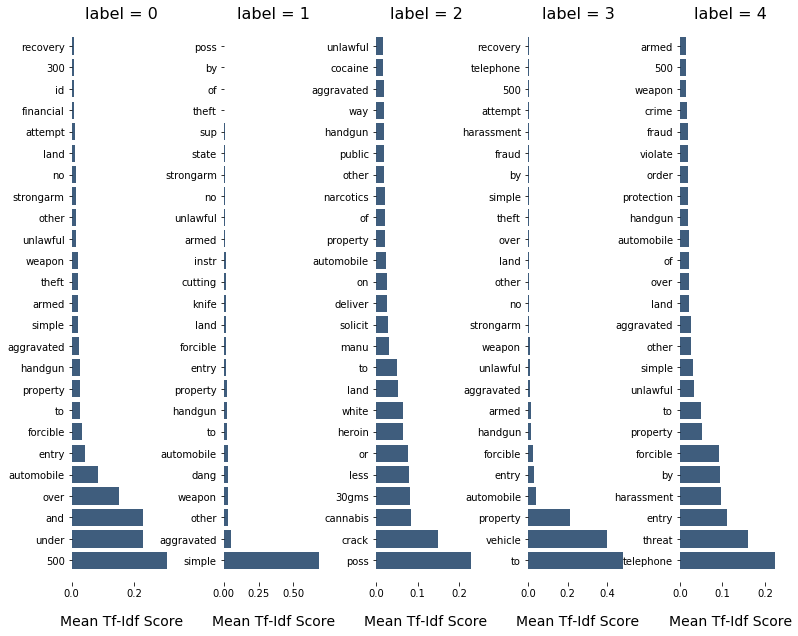

In [90]:
plot_tfidf_classfeats_h(dfs)